In [1]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import json
import torch
import torch.nn as nn
import albumentations as A
import numpy as np

In [1]:
!tar xf cropped_images_.tar.xz

In [5]:
import os

In [6]:
len(os.listdir('cropped_images'))

514380

In [47]:
def preprocess(face):
    compose = A.Compose([A.Resize(120, 120), A.Normalize()], p=1)

    return np.expand_dims(np.swapaxes(
            np.swapaxes(compose(image=face)["image"], 2, 0), 1, 2
           ), axis=0)



def show_detections(path, detections):
    img = cv2.cvtColor((cv2.imread(path)), cv2.COLOR_BGR2RGB)
    for result in detections:
        x1, y1, x2, y2 = result[0:4].astype(int)
        x1, y1, x2, y2 = max(x1, 0), max(y1, 0), max(x2, 0), max(y2, 0),
        _, pr =model(torch.from_numpy(preprocess(img[y1:y2, x1:x2])))
        predicted_labels = float(torch.sum(pr, dim=1)[0])
        conf = round(result[-1], 2)
        plt.title(f"{predicted_labels}, {conf}")
        plt.imshow(img[y1:y2, x1:x2])
        plt.show()

In [48]:
df = pd.read_pickle("wild_ages_with_detections.pk")


In [ ]:
for index, row in df.iterrows():
    path = row['paths']
    detections = row['detections']
    show_detections(path, detections)
    if input() == 'e':
        break

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../ages_from_the_wild.csv')

In [12]:
df.dropna(subset=['age']).to_csv("../ages_from_the_wild.csv")

In [22]:
df = df.dropna(subset=['age'])

In [13]:
from sklearn.model_selection import train_test_split


In [17]:
df['name'] = df['name'].astype('str')

In [24]:
df['age'] = df['age'].astype('int')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_test["pretrained"] = [31,16,14,9,37,7,42,82,42,1,38,1,41,8,14,4,5,34,40,3,3,14,23,37,2,17,37,16,5,80,40,9,32,30,50,15,4,16,39,34,13,40,5,39,39,8,10,1,1,37,39,34,40,15,41,2,29,16,40,41,44,26,16,6,3,43,31,34,14,45,57,34,18,70,30,55,9,45,81,69,4,3,19,36,36,33,2,89,39,64,13,7,5,70,32,16,2,2,5,16,43,2,38,2,35,54,43,90,5,6,3,31,40,39,37,33,31,36,90,40,42,37,4,45,36,6,36,31,30,67,81,4,39,37,31,18,40,3,27,4,15,36,31,36,41,39,33,0,32,9,8,33,22,37,19,38,32,25,37,2,23,16,38,29,41,34,11,1,41,5,0,1,34,9,2,27,3,44,37,40,30,34,38,36,2,42,6,6,7,43,33,4,14,4,42,38,2,80,36,27,40,38,41,18,17,23,5,42,4,13,29,5,13,5,2,42,33,18,19,37,43,32,18,85,4,28,2,49,6,44,26,7,31,30,8,18,20,9,8,31,39,2,39,34,6,6,9,34,45,8,19,16,32,43,37,36,16,54,33,47,32,39,40,24,42,42,72,46,34,3,3,26,41,10,49,41,69,2,27,9,36,8,7,37,39,30,58,24,37,36,39,26,3,38,20,80,38,39,1,0,38,35,43,27,45,3,18,17,38,4,20,20,31,7,45,30,4,36,1,35,4,76,40,17,2,4,10,26,18,21,10,16,44,41,34,4,1,40,33,4,45,37,18,22,3,29,26,4,20,32,20,5,45,17,86,39,11,23,38,38,18,33,32,43,33,40,29,16,11,41,33,19,44,37,16,75,3,40,42,44,41,40,10,43,45,4,20,44,53,28,7,39,40,4,29,21,37,22,7,17,37,37,39,27,14,42,38,41,49,41,32,43,3,3,8,14,34,32,29,33,22,31,18,31,44,17,42,3,26,27,41,38,40,3,11,27,45,23,36,25,40,40,0,33,14,42,37,9,6,31,38,27,36,45,33,6,43,9,40,9,1,14,18,17,10,17,16,8,34,22,90,90,41,37,21,11,38,26,17,35,88,36,31,31,15,23,2,50,35,2,30,39,37,43,41,36,38,3,2,41,36,42,18,37,43,32,5,41,3,66,43,39,5,44,33,4,38,40,18,14,41,40,45,20,9,23,40,33,70,2,2,58,1,33,24,3,25,31,8,40,4,9,42,36,40,8,38,67,6,41,34,41,29,33,35,6,72,9,16,35,40,2,0,31,39,13,33,33,5,55,44,36,39,18,26,37,4,41,5,37,39,33,81,70,41,27,51,37,1,43,89,15,20,45,3,74,40,11,4,42,42,44,44,53,3,40,4,40,36,42,54,29,43,26,24,4,35,13,7,36,37,37,40,41,7,33,41,35,37,18,53,18,41,50,37,19,34,1,3,37,36,88,36,38,4,4,38,29,39,17,6,35,40,19,32,38,40,38,44,32,37,37,16,41,34,7,36,40,52,32,33,18,23,6,10,0,31,26,33,35,32,33,55,26,38,34,25,4,42,15,80,27,28,28,24,42,36,32,4,50,39,62,42,55,16,35,30,44,82,69,0,73,39,14,43,39,40,90,75,3,33,37,90,37,1,20,33,38,3,43,26,47,37,37,44,5,26,3,42,4,38,44,24,2,2,36,28,21,3,44,38,19,42,2,16,13,18,49,42,70,1,43,21,39,38,14,34,2,42,5,7,26,38,42,17,78,30,33,4,37,6,2,40,5,4,65,54,38,40,11,36,29,15,36,39,60,38,1,18,40,39,28,40,39,80,2,15,43,41,38,6,39,1,19,27,33,38,41,5,36,28,24,39,31,40,39,32,56,1,27,6,27,30,33,32,4,44,4,3,39,5,31,39,3,0,35,44,35,18,42,24,25,40,3,13,0,3,34,31,31,13,1,34,55,25,15,34,37,40,39,5,34,18,69,2,75,43,34,9,33,6,35,37,79,31,40,31,5,41,38,45,26,33,33,2,39,3,2,39,17,19,34,6,40,44,38,3,34,55,38,1,27,5,38,20,45,36,31,6,43,40,7,23,2,20,44,16,37,37,31,35,56,13,17,3,52,50,21,2,45,42,35,25,42,3,3,42,21,34,49,35,32,0,13,1,37,83,39,31,6,46,26,4,18,39,33,0,0,32,23,41,41,33,34,8,16,2,20,31,21,35,9,3,29,15,34,6,21,62,51,36,32,5,56,37,20,41,3,39,34,4,30,27,30,6,43,40,6,55,33,6,42,6,34,45,37,22,45,47,18,35,37,47,4,35,30,69,39,38,36,52,37,41,21,39,41,44,24,80,26,39,30,34,40,14,37,41,36,58,36,38,33,33,13,17,33,39,24,41,32,20,4,35,37,4,43,44,83,35,3,42,45,16,38,44,3,42,27,0,37,37,41,11,8,5,15,29,38,25,0,15,33,3,19,74,24,37,36,35,5,34,39,14,34,35,29,33,35,13,38,40,49,36,15,44,40,21,36,85,10,43,28,31,41,43,37,28,33,31,27,2,33,35,17,49,6,43,20,32,31,2,38,56,42,38,80,23,38,36,39,36,32,38,41,2,16,44,37,36,13,3,3,34,32,40,44,18,24,32,5,39,4,40,41,62,43,3,3,9,55,26,18,32,23,2,33,25,14,37,41,4,89,40,14,10,41,34,20,45,32,41,38,5,51,11,38,23,17,3,32,31,23,38,8,5,35,40,24,36,39,32,36,90,4,22,34,32,27,51,31,6,75,35,34,32,6,35,35,34,41,14,36,42,85,8,44,36,5,28,38,43,40,0,2,0,20,41,4,20,14,38,42,31,3,29,3,26,32,37,51,20,33,36,42,37,38,27,2,32,42,31,39,19,35,40,37,39,40,4,3,8,25,31,42,42,38,1,40,37,3,1,59,39,66,7,9,40,33,40,44,25,27,3,26,32,26,19,28,17,4,90,39,39,56,82,2,32,37,39,4,42,3,4,14,33,3,7,38,44,49,26,65,32,39,44,45,3,36,39,24,39,75,42,29,4,38,38,2,19,70,34,5,2,7,38,14,37,43,34,2,21,28,90,21,31,3,38,18,29,39,35,10,26,23,32,30,61,90,37,45,19,32,15,2,28,37,58,75,47,3,16,37,5,41,35,20,40,40,44,32,39,34,61,40,37,43,87,22,34,43,26,42,19,5,35,42,37,27,37,39,36,42,32,27,39,20,3,40,34,41,9,3,8,32,2,38,42,26,84,75,37,30,33,40,45,32,14,3,2,27,0,35,18,40,19,43,1,4,78,5,35,1,4,3,58,44,26,3,25,43,41,5,75,34,15,40,39,38,31,74,41,20,25,33,23,5,31,22,38,36,33,43,17,13,43,56,15,36,75,4,17,46,68,7,8,11,23,47,3,3,5,31,36,21,73,39,34,34,90,39,20,40,44,40,40,32,14,22,35,19,0,40,34,2,4,24,34,38,34,68,16,22,17,2,45,37,36,40,42,30,37,34,39,12,34,47,30,23,15,42,31,38,34,33,39,35,19,39,29,20,8,33,18,36,29,42,40,7,13,33,18,1,2,40,23,4,0,44,38,0,44,42,48,3,41,32,6,35,70,87,35,39,2,16,38,5,44,19,44,32,2,57,39,35,41,17,15,19,42,42,52,52,17,30,41,32,41,49,37,42,49,37,33,33,25,42,29,20,1,4,5,41,90,15,5,2,49,3,10,39,32,42,90,24,44,40,0,37,13,0,3,21,36,38,3,3,17,55,35,38,44,9,17,6,1,20,6,10,17,18,39,66,71,87,2,16,15,40,28,17,40,26,4,17,2,43,44,7,41,40,37,6,41,0,31,33,42,11,4,41,40,22,45,6,27,11,3,37,26,33,21,9,44,2,24,31,23,3,38,42,4,38,41,38,41,15,39,19,18,34,35,23,4,45,21,38,39,20,40,3,17,30,27,28,50,1,22,11,28,14,38,15,45,41,61,40,38,0,81,40,29,14,0,41,33,33,64,90,41,45,32,30,29,36,16,13,0,81,45,58,63,1,58,29,41,41,41,45,31,33,10,18,35,36,6,20,38,30,3,39,3,36,38,41,34,43,3,14,17,43,31,5,33,2,85,2,33,42,33,29,37,25,35,28,45,42,39,20,39,40,3,1,42,33,36,19,70,36,28,28,42,31,4,39,39,42,17,28,8,18,50,77,27,29,5,41,14,23,2,84,36,33,25,90,70,69,55,18,45,38,16,25,57,3,40,24,80,37,24,4,43,41,36,23,8,21,40,30,80,26,18,36,18,32,79,57,30,16,16,34,44,39,37,50,39,37,4,34,43,36,49,38,6,43,37,38,37,39,44,27,40,5,36,15,40,6,76,9,31,0,33,35,55,2,5,49,33,38,32,35,5,86,36,35,17,52,72,69,24,1,25,20,9,40,44,13,5,37,2,6,3,37,19,2,39,20,40,31,33,70,37,87,6,6,26,39,15,35,50,3,9,37,53,32,16,39,40,36,5,70,8,63,3,64,40,2,42,32,1,18,35,8,34,8,35,44,42,55,37,24,13,40,39,34,33,48,20,36,12,26,5,35,4,9,5,2,32,41,39,3,39,37,6,35,33,2,4,20,3,3,33,37,34,36,28,21,36,38,4,4,19,49,9,35,8,20,40,38,30,82,84,20,30,67,2,5,38,3,40,8,41,23,43,37,7,34,5,37,11,55,40,90,23,23,36,1,37,3,22,26,36,38,2,16,7,52,4,38,43,7,37,44,34,42,5,1,37,35,90,26,15,42,82,34,18,31,29,38,36,5,37,8,30,26,39,29,37,32,7,4,72,29,2,37,6,32,17,35,31,41,40,26,31,40,23,1,16,38,43,6,38,58,23,39,39,16,30,1,44,37,39,49,33,43,16,4,37,37,27,42,22,38,34,30,31,18,5,34,70,22,2,39,21,20,26,13,40,26,3,40,6,8,49,2,19,19,45,27,42,19,8,31,3,4,33,31,31,41,39,89,42,16,6,42,31,27,57,22,5,38,82,38,32,25,38,32,41,21,15,37,18,28,90,33,7,66,30,40,3,7,23,41,38,40,36,23,38,16,38,24,41,35,53,10,3,26,18,28,42,58,73,40,22,40,38,44,41,24,5,7,17,13,2,30,39,41,8,5,33,38,88,15,14,58,44,11,37,2,36,22,33,3,1,4,35,36,39,38,38,70,41,41,13,40,20,39,90,39,72,4,3,28,40,2,42,40,29,39,39,33,44,41,4,18,1,75,31,41,44,84,40,5,16,31,28,42,5,38,30,39,36,33,41,2,26,20,41,24,80,33,42,41,20,40,14,4,39,5,2,16,41,51,29,45,67,90,41,19,36,3,53,62,72,38,16,40,45,17,36,61,20,40,42,41,42,60,36,37,3,26,43,17,1,9,18,17,47,43,9,23,5,0,28,22,37,38,38,41,33,21,3,35,15,23,36,34,30,32,41,24,9,50,81,32,80,32,76,40,23,32,44,39,34,29,35,18,55,24,16,3,33,80,21,39,8,40,40,36,63,17,5,52,5,39,90,13,3,3,44,32,9,44,2,5,34,29,31,30,39,16,72,24,31,33,33,39,40,41,38,15,13,20,3,37,23,42,7,30,44,32,1,36,79,13,3,45,90,29,4,38,39,73,38,39,40,37,35,37,10,47,29,38,20,41,15,37,39,44,0,20,34,31,3,4,14,80,32,53,30,33,36,15,17,2,32,15,26,36,36,28,31,16,4,31,26,4,29,42,36,35,7,49,3,2,36,33,20,34,41,37,42,43,4,60,2,70,31,29,0,44,83,13,38,29,23,27,3,43,17,5,3,4,20,18,42,37,3,31,36,39,39,41,38,5,3,87,26,0,40,35,39,44,14,1,40,19,6,34,32,25,62,14,51,30,23,42,3,39,21,46,5,34,15,38,40,34,72,31,41,44,6,39,16,6,38,11,15,2,80,33,39,2,38,1,49,40,33,24,42,25,40,37,29,19,34,7,2,40,41,49,51,36,37,15,14,39,18,39,23,90,37,30,13,32,29,38,40,2,20,45,56,15,46,36,31,6,38,37,0,42,5,14,12,39,18,20,26,18,80,40,13,26,30,20,8,86,40,44,31,31,35,1,70,33,24,5,24,39,6,29,4,5,5,39,31,43,35,62,11,26,80,24,2,38,4,5,50,86,34,43,21,42,6,4,53,16,17,34,83,34,5,34,70,14,5,23,31,2,17,38,37,32,2,4,38,57,74,41,18,32,27,5,4,32,22,10,41,42,36,44,1,39,6,4,34,15,29,25,39,39,2,2,42,2,34,48,39,20,13,34,29,39,31,4,89,31,5,58,26,32,3,0,29,40,38,38,27,13,19,7,37,31,13,5,3,40,3,44,41,11,40,33,53,38,42,39,42,80,39,28,38,34,35,34,8,44,3,4,31,54,33,1,16,41,43,24,40,3,22,27,28,31,3,35,45,68,38,13,23,5,3,20,41,19,11,41,16,9,3,6,19,67,18,8,9,38,80,20,6,42,14,53,41,39,32,10,17,8,42,32,27,40,24,10,29,36,49,34,41,36,2,37,6,9,19,46,89,21,31,58,41,3,42,34,1,38,52,85,40,2,89,33,40,25,44,20,5,31,36,40,5,22,40,18,44,2,30,40,31,40,7,20,40,40,7,1,31,25,19,34,3,31,14,0,25,42,3,36,55,28,8,38,2,38,47,35,10,35,1,20,18,37,39,4,14,35,34,31,6,37,3,41,40,18,7,55,18,90,90,6,17,51,29,39,39,5,22,37,41,31,37,44,35,50,39,57,72,89,7,36,85,5,82,28,11,2,2,5,32,42,5,44,30,5,6,3,20,49,24,14,1,15,44,75,52,42,29,4,41,4,31,1,38,8,36,40,37,6,39,1,3,0,80,31,34,34,90,33,29,21,6,1,23,38,39,21,40,37,73,35,44,16,2,30,22,15,41,40,38,38,90,38,17,14,37,2,21,22,40,89,17,41,53,41,26,2,32,32,38,38,20,37,39,64,4,32,3,5,38,20,7,39,3,37,3,14,3,4,3,45,40,19,4,72,3,14,15,58,28,3,31,40,9,6,41,20,36,1,37,22,3,36,44,17,6,4,55,23,33,5,21,7,34,49,42,5,34,16,31,22,35,29,40,38,80,22,3,33,4,38,2,26,16,4,1,38,21,34,39,37,43,8,17,38,35,38,3,34,33,41,37,26,62,43,17,10,34,16,5,2,20,2,78,4,28,30,40,40,35,38,40,6,38,29,40,90,32,31,3,83,39,40,5,42,21,20,90,39,81,31,33,36,38,80,4,34,19,31,49,39,26,17,58,42,39,85,1,2,40,36,34,26,2,27,40,37,31,20,39,4,36,14,39,39,43,31,29,22,24,6,12,34,44,2,33,2,80,21,43,20,29,13,41,40,36,37,30,44,42,18,5,34,30,29,34,28,13,24,87,43,43,31,40,0,38,33,4,4,36,44,23,18,15,88,24,3,16,71,36,33,33,10,34,3,28,40,84,29,27,6,4,21,56,35,30,36,2,2,32,38,24,6,16,33,41,43,26,17,39,17,3,16,41,33,73,18,38,52,53,20,40,33,16,16,33,15,5,20,4,42,9,22,32,70,34,3,39,39,75,90,83,33,44,35,41,9,18,4,36,58,32,35,16,4,35,15,9,3,24,5,26,37,36,8,39,28,40,42,31,41,38,2,37,39,40,3,4,41,15,23,7,40,28,32,10,43,40,10,8,1,85,2,36,56,30,29,15,34,21,30,42,37,1,31,28,26,52,50,27,73,42,46,4,39,1,29,5,43,36,31,27,4,5,17,6,27,23,60,33,0,11,38,2,37,41,84,37,70,2,26,65,4,37,41,6,1,90,30,29,25,12,32,8,42,5,38,6,45,39,37,27,37,9,3,36,31,40,37,2,29,38,41,38,4,0,3,6,4,5,38,32,39,40,0,34,35,32,88,5,43,17,38,41,40,29,40,17,15,29,0,31,49,77,25,37,19,39,38,13,39,4,43,1,19,39,32,38,43,22,19,52,42,18,7,10,65,42,20,7,72,33,38,8,39,31,1,34,40,9,6,39,43,15,49,33,36,2,29,39,31,49,32,2,16,7,90,32,40,87,36,74,15,22,6,47,31,34,27,34,5,38,30,20,2,2,3,39,34,41,3,80,32,1,22,40,41,31,1,45,52,21,3,1,18,39,38,24,41,41,37,17,77,36,35,81,35,37,42,29,38,39,58,4,14,9,3,68,2,41,3,6,42,40,35,34,28,14,2,20,38,41,18,3,37,41,2,3,16,35,39,84,44,25,23,44,19,35,43,38,3,31,5,54,34,35,35,30,38,39,24,32,40,20,3,15,39,41,27,28,11,34,16,31,40,31,49,4,27,33,10,9,39,52,14,72,55,18,17,37,2,45,43,44,38,36,31,46,40,32,20,37,40,28,70,23,3,45,42,16,38,1,27,30,39,21,17,37,11,39,43,37,32,41,18,38,37,38,5,7,28,4,0,30,37,38,32,2,2,15,39,33,0,39,43,38,5,5,3,3,9,38,2,4,18,25,41,39,4,9,2,15,31,17,47,90,33,4,55,53,41,1,37,6,43,41,41,40,45,31,3,39,83,38,43,55,45,1,41,80,34,9,11,33,42,26,4,37,10,43,40,22,3,31,1,34,38,9,41,31,3,36,39,2,30,25,0,42,5,38,31,28,27,11,1,34,1,36,39,39,26,23,28,52,79,73,30,41,18,31,80,42,41,38,17,49,32,30,17,77,31,37,40,18,40,37,37,9,33,39,36,84,35,36,26,5,36,33,25,12,32,80,39,37,33,32,83,38,41,37,39,5,89,83,56,3,4,2,2,17,42,2,1,27,18,26,4,40,8,20,90,1,2,39,26,14,34,3,17,34,83,25,4,0,37,37,2,39,17,21,1,20,2,52,16,3,82,39,81,45,42,37,20,41,37,21,5,30,42,31,31,7,34,38,18,26,38,33,40,34,18,37,21,7,40,32,33,17,54,43,5,43,40,33,45,38,81,38,3,20,17,6,20,39,57,71,34,25,38,0,1,41,31,43,39,2,6,6,30,0,42,63,7,40,71,37,3,41,6,0,22,81,3,42,6,33,38,17,39,77,41,29,23,81,34,31,41,33,55,45,80,19,5,38,31,13,19,38,16,16,20,40,37,14,1,37,45,29,4,33,39,32,46,34,32,25,0,32,29,0,34,36,37,3,6,16,40,28,5,3,41,31,10,47,1,44,25,2,49,24,27,43,11,18,28,4,3,5,32,3,38,2,6,72,38,37,16,15,34,24,28,58,34,82,9,82,16,47,20,3,38,3,20,0,29,1,24,38,40,39,33,4,17,35,33,31,41,32,31,37,39,39,39,55,25,39,40,4,29,16,34,28,31,49,22,33,5,4,26,31,32,20,34,44,39,38,45,25,35,4,1,29,3,24,41,3,26,36,18,2,40,36,57,11,16,7,37,10,90,22,38,53,26,1,14,22,31,2,16,17,49,38,73,44,2,32,4,36,24,31,40,39,0,3,31,7,40,32,20,2,20,33,20,41,16,16,0,32,15,22,3,51,6,39,30,41,43,39,31,1,40,6,17,43,43,58,22,20,39,42,15,34,33,38,4,40,90,21,37,33,26,36,23,38,30,22,37,0,2,21,17,16,29,19,29,30,17,24,42,42,39,14,27,4,2,31,31,35,18,40,40,15,6,45,41,40,42,37,18,1,6,38,3,37,38,38,3,52,41,2,52,41,35,43,25,34,36,39,39,42,5,34,16,3,63,37,43,3,27,89,31,32,24,89,87,39,8,18,19,1,13,42,21,72,90,36,32,2,82,19,41,41,1,88,41,6,21,17,18,85,14,17,40,41,5,69,42,3,3,32,39,13,37,25,39,4,32,35,5,27,5,69,8,78,11,36,30,7,3,38,45,6,32,18,4,21,30,72,2,33,5,42,31,5,39,26,21,28,11,81,36,6,21,31,13,40,10,36,36,5,15,17,10,23,22,17,38,36,12,2,42,34,31,28,21,36,3,73,2,1,25,28,3,27,38,33,41,3,3,13,9,33,20,2,38,2,40,20,41,34,6,32,45,49,32,43,16,3,43,20,41,4,33,16,8,22,44,40,15,32,5,31,16,49,37,3,54,17,2,38,39,44,37,29,33,35,39,37,4,0,24,40,8,18,70,40,6,31,16,37,38,2,39,2,26,38,10,4,26,16,23,2,29,63,36,40,43,3,2,15,0,34,4,35,75,0,6,44,37,1,44,40,39,39,21,37,39,89,39,17,45,39,39,32,3,41,29,74,39,69,31,29,36,24,0,34,10,11,40,38,23,23,16,30,42,30,8,45,62,4,50,10,13,36,39,33,6,31,1,21,41,20,1,2,32,31,89,7,27,34,4,41,40,29,26,31,1,31,82,85,90,17,29,17,17,72,33,23,31,40,5,33,33,49,40,36,33,31,41,41,42,32,38,39,5,18,21,48,39,6,18,70,65,38,40,25,35,39,22,70,24,36,44,2,36,41,15,18,90,37,42,5,43,37,24,0,20,15,58,43,38,34,39,36,2,4,75,33,34,46,8,35,24,43,42,1,43,2,41,19,32,27,2,43,25,2,90,31,44,1,2,57,5,40,40,29,5,32,35,21,37,33,69,6,68,26,39,43,35,3,32,55,87,5,30,38,33,1,40,5,76,89,41,59,2,1,23,13,14,4,7,31,75,18,87,35,38,38,44,2,21,3,90,38,77,44,9,41,22,43,22,43,46,3,17,17,29,39,42,9,18,31,38,37,38,15,10,34,55,4,90,23,36,32,21,3,1,3,31,1,15,38,42,1,37,2,31,8,40,15,24,16,29,31,0,7,5,42,35,28,16,37,40,6,23,13,1,42,3,30,36,42,31,10,47,40,35,4,5,33,37,39,38,5,23,36,79,44,0,29,42,32,38,38,40,1,39,43,8,21,36,38,44,6,90,34,35,70,45,36,15,41,15,23,41,35,3,35,14,34,44,45,37,32,3,58,15,39,26,40,39,3,11,33,18,40,2,41,11,40,33,3,31,21,24,38,35,20,32,5,30,90,38,14,18,32,32,44,10,28,40,27,40,20,8,37,29,18,41,24,17,26,5,5,2,27,39,42,9,17,56,32,37,39,39,35,35,37,39,3,62,14,40,2,54,3,35,21,88,38,4,36,1,39,23,0,31,40,37,21,2,25,19,3,26,41,8,9,22,0,3,41,3,14,70,6,1,32,15,35,60,25,32,25,43,18,41,10,36,14,4,18,18,37,20,24,22,2,8,11,35,1,6,18,42,0,5,32,39,43,42,90,17,90,89,41,71,33,35,37,16,33,38,0,33,2,1,0,3,43,40,20,21,3,37,83,36,56,29,84,32,18,34,17,20,7,36,26,41,34,87,40,3,4,39,35,4,16,34,8,11,13,40,80,45,45,34,3,45,83,36,19,2,3,3,6,40,42,84,11,44,37,30,34,2,25,80,41,80,3,5,35,37,4,25,0,33,19,35,42,35,37,0,40,9,32,36,23,0,43,85,42,29,36,35,2,16,37,5,41,18,5,42,51,63,7,90,6,89,4,39,32,34,45,33,29,33,40,2,17,37,18,3,43,41,18,23,5,44,38,36,83,8,23,45,43,39,39,36,19,21,2,77,30,39,36,1,61,29,24,39,37,39,34,35,39,14,40,33,25,4,29,39,29,18,51,39,2,51,42,42,38,17,39,31,21,45,42,18,34,6,37,11,38,67,37,17,19,33,27,17,45,80,38,37,5,16,20,35,19,3,42,39,80,36,35,38,40,29,22,38,23,37,4,5,1,3,40,44,37,41,7,18,36,30,22,41,34,36,44,90,23,37,7,23,42,43,32,38,6,39,42,42,10,39,37,40,31,37,40,3,5,16,28,23,38,39,6,3,21,17,36,36,17,42,15,38,42,39,40,3,5,35,82,41,3,43,24,32,21,40,40,72,58,32,4,40,15,58,35,41,45,17,53,15,50,40,10,38,45,44,38,30,19,26,42,17,40,27,40,39,39,25,4,37,10,32,0,4,41,31,17,42,88,38,43,41,37,22,45,13,1,73,13,4,10,31,2,39,7,80,42,43,4,39,0,36,20,18,3,4,35,6,39,48,81,58,42,40,19,37,41,88,37,18,12,18,17,28,0,39,39,33,11,31,40,35,33,38,3,36,36,17,55,40,19,33,2,49,70,39,1,1,7,40,16,2,44,32,39,90,34,39,11,34,31,15,41,28,17,1,4,41,35,4,55,70,35,42,14,36,8,49,34,37,90,43,2,12,16,40,42,38,43,20,24,20,40,4,20,39,41,38,39,39,31,78,19,9,20,1,45,38,70,32,41,47,16,0,15,31,37,83,8,37,36,13,40,42,28,40,89,38,1,26,1,38,19,1,16,3,20,33,42,7,3,21,30,4,6,19,31,1,38,38,38,40,47,40,32,34,15,44,30,82,2,17,38,32,37,9,43,10,38,2,1,36,37,39,9,31,50,30,17,17,49,38,29,43,43,33,90,37,22,41,39,27,4,22,37,41,36,33,32,4,87,37,1,33,32,17,30,2,55,20,31,90,53,40,26,44,18,18,2,34,37,45,70,35,20,31,40,39,15,18,15,27,43,18,34,10,4,29,19,41,16,3,2,2,44,22,14,1,16,11,38,41,36,72,2,33,44,17,38,30,45,8,40,18,17,11,22,41,73,13,90,50,32,90,22,13,56,34,12,24,30,33,90,41,41,39,30,32,33,28,36,44,40,15,21,81,30,4,17,17,4,0,3,3,2,40,37,32,1,3,17,33,34,18,27,9,44,4,38,33,33,4,7,32,39,36,35,31,37,43,38,38,22,32,35,21,38,20,84,90,85,33,33,0,8,39,33,38,44,39,39,5,4,44,26,31,16,4,39,3,4,16,3,1,3,50,36,36,3,32,42,39,39,32,43,10,42,21,3,34,38,44,16,38,51,14,72,2,32,13,80,3,3,9,13,2,36,24,47,33,38,18,40,24,35,62,8,38,43,41,40,6,79,42,57,26,33,36,2,43,26,35,20,7,70,44,10,40,39,31,90,35,33,8,4,15,13,38,11,39,41,41,40,33,42,18,24,43,44,40,34,34,45,36,42,40,38,39,26,90,80,39,37,39,29,41,33,34,35,50,40,1,1,7,55,41,18,15,33,41,81,80,30,1,2,14,45,27,11,1,0,88,44,17,44,41,17,2,40,43,34,35,24,39,3,90,42,44,23,44,27,38,34,9,10,38,23,18,29,3,40,39,11,13,30,18,33,3,0,41,4,56,36,26,33,2,14,32,80,32,44,19,27,17,0,33,39,33,1,46,11,37,52,58,41,4,41,40,44,22,13,28,5,23,19,15,36,10,16,34,32,16,70,72,12,33,33,37,9,15,15,5,1,36,16,37,44,6,37,2,4,15,17,18,17,40,38,1,16,33,33,17,54,53,31,43,1,3,19,31,31,27,38,40,34,32,43,15,28,38,62,38,15,40,44,39,10,34,38,2,2,5,31,25,38,35,40,8,41,45,8,38,34,9,17,45,52,36,37,33,62,36,14,40,38,9,37,7,44,31,34,14,42,29,25,34,0,15,31,84,5,49,36,8,38,10,2,42,38,49,4,14,35,37,38,32,42,10,20,20,89,29,34,10,20,3,68,34,1,8,28,36,39,44,35,18,18,82,35,60,24,11,31,19,10,22,6,0,34,43,18,44,33,39,24,41,44,3,37,1,50,39,3,30,46,6,21,24,28,31,31,24,80,85,5,10,38,40,43,25,3,39,37,29,6,32,70,3,38,38,2,2,44,45,37,40,0,64,41,33,80,41,12,3,17,20,35,36,43,41,53,14,15,39,82,2,38,38,88,1,16,29,27,34,35,30,16,40,40,47,24,39,37,37,42,39,22,68,41,90,26,35,31,34,70,13,20,22,6,17,6,32,0,6,27,6,32,42,16,19,16,20,14,13,38,19,31,41,23,36,15,2,53,41,19,33,40,37,3,29,20,37,0,27,87,2,48,34,31,18,3,38,26,24,29,21,48,22,32,4,18,20,4,0,37,81,3,43,31,0,16,34,36,38,13,38,2,44,20,2,39,8,2,2,64,33,3,2,37,2,15,1,9,4,39,38,36,31,23,36,5,29,23,30,27,43,18,39,32,2,25,11,12,31,31,24,45,17,27,0,7,45,38,36,40,33,39,36,13,37,39,2,36,52,55,33,50,23,39,4,4,39,13,40,5,31,0,8,40,41,36,3,17,29,37,3,29,6,58,6,37,36,37,37,33,19,3,85,75,35,40,41,43,23,37,37,14,17,31,34,3,81,15,2,21,39,21,9,35,22,8,39,37,36,48,5,37,35,8,21,12,13,34,35,43,30,3,2,20,13,40,3,41,0,32,31,38,27,28,32,87,0,36,39,30,90,0,15,5,34,30,4,16,42,4,15,1,45,30,37,18,40,16,4,25,26,29,18,3,33,33,40,36,6,23,2,17,19,71,37,28,36,4,40,41,38,38,43,3,36,35,39,25,40,41,4,8,3,41,33,41,40,4,37,38,39,21,84,11,34,2,24,6,38,38,17,16,5,43,16,2,48,37,44,0,33,34,32,40,40,17,34,37,52,18,38,42,31,6,58,9,24,81,38,4,37,3,25,41,38,35,21,32,41,26,44,42,19,17,16,61,21,6,13,33,68,20,22,41,38,36,8,17,4,40,90,37,35,0,48,21,41,37,27,8,1,33,37,42,40,41,0,7,26,40,44,32,21,38,33,21,36,34,9,43,50,31,43,32,25,11,19,62,33,45,42,50,0,41,10,38,34,32,39,5,10,41,44,35,17,41,24,70,36,40,1,38,26,49,4,39,4,35,52,84,28,22,42,20,0,36,40,27,24,2,54,44,38,1,72,9,19,31,40,36,4,33,44,39,2,33,24,32,35,14,3,4,5,41,38,5,19,42,32,4,35,39,4,18,15,34,10,39,52,42,36,23,8,40,41,43,41,5,53,46,8,8,31,42,2,33,41,16,18,19,38,23,44,70,44,31,3,44,29,56,41,13,36,22,5,23,2,31,9,40,4,16,5,37,33,53,5,54,7,44,37,45,55,71,35,42,42,32,28,45,42,44,45,4,4,38,35,18,5,19,17,27,31,32,18,18,45,3,41,18,20,40,41,10,18,38,37,43,16,3,33,43,5,15,5,40,41,8,35,15,36,22,38,5,36,36,2,4,29,38,16,0,4,43,38,40,38,25,1,41,17,4,28,18,40,35,33,23,2,4,44,39,1,23,40,50,5,21,42,33,4,18,40,15,17,34,4,31,40,5,61,40,30,72,80,80,20,38,51,17,11,18,53,20,44,39,44,35,42,2,37,34,34,33,32,42,6,33,5,38,15,0,20,28,51,48,38,60,29,33,3,42,2,3,29,17,6,27,24,49,39,24,1,33,33,14,19,38,3,4,40,62,45,36,10,40,38,3,41,31,28,56,28,32,20,4,27,58,3,13,37,34,18,70,0,35,29,44,39,35,21,90,34,1,6,23,38,22,5,16,2,36,20,47,41,42,21,39,82,43,74,39,29,24,7,45,40,44,44,35,17,8,22,55,37,50,33,34,26,33,44,36,37,70,13,8,31,23,3,40,70,38,38,41,23,25,0,5,39,21,36,43,20,41,7,44,32,7,44,57,51,54,7,40,1,17,2,3,3,31,56,32,14,42,39,44,18,36,1,35,17,37,29,33,34,3,2,29,35,33,6,40,39,5,31,86,8,2,40,8,11,28,21,83,45,27,36,44,7,3,23,35,37,26,40,37,38,6,42,31,27,39,42,34,20,36,32,20,10,29,89,41,41,34,25,41,84,32,21,35,17,84,90,43,23,38,4,37,15,85,67,33,16,4,31,86,9,23,2,35,43,4,37,82,28,37,38,41,2,43,39,53,20,2,42,39,3,41,44,1,21,19,38,29,40,38,33,54,31,30,18,31,39,44,15,4,20,35,5,26,32,38,23,35,42,0,40,30,62,14,40,74,52,14,3,80,16,90,40,44,56,22,41,33,5,3,26,37,8,15,20,33,1,37,40,7,8,39,11,86,38,4,42,41,35,39,0,39,33,21,40,0,59,39,42,23,43,38,53,1,49,1,31,10,33,22,11,31,7,33,15,24,6,5,0,1,40,11,87,14,5,4,21,85,24,34,43,38,5,41,3,38,37,86,40,20,5,9,10,43,16,9,38,78,30,34,10,26,34,3,36,40,35,38,34,44,7,32,34,18,32,18,49,54,27,23,16,39,44,26,4,37,20,31,2,15,73,32,37,43,30,2,3,32,37,34,34,10,26,28,3,29,39,24,8,20,0,55,35,4,11,3,4,6,39,49,10,30,28,43,31,35,38,25,33,17,17,7,16,16,31,45,44,74,11,38,18,34,77,5,30,40,40,35,37,29,20,40,20,39,30,14,34,29,13,9,36,40,19,80,8,32,3,35,7,2,83,34,30,18,31,44,42,22,24,4,13,41,9,69,5,3,19,70,3,20,36,5,26,2,4,3,3,31,89,38,41,38,43,38,14,42,81,4,0,33,40,63,31,0,6,40,0,42,35,4,37,23,2,6,80,2,87,23,38,13,45,4,38,86,29,3,5,40,6,3,2,2,44,25,34,30,34,21,15,43,42,5,3,4,30,13,23,61,56,38,17,4,1,41,7,86,35,1,43,6,39,13,39,15,29,32,7,7,35,3,31,19,41,86,49,40,37,40,49,23,17,28,37,3,5,83,32,39,1,65,40,70,42,5,38,37,34,84,15,15,18,14,40,13,85,40,34,17,42,34,33,34,33,38,15,42,41,39,51,37,37,42,33,23,43,53,3,28,36,43,2,39,23,42,37,39,37,38,77,29,41,21,90,38,1,67,44,2,5,38,50,3,6,5,87,41,87,35,34,8,36,4,33,3,80,2,84,17,39,57,40,29,16,50,23,33,41,40,42,23,41,2,42,6,11,26,41,44,37,14,24,41,16,26,37,20,42,5,43,44,25,56,35,50,1,40,2,10,36,9,24,75,43,37,39,70,6,41,40,33,14,34,2,4,18,37,13,7,39,40,37,29,33,37,45,24,3,10,16,9,25,40,17,33,39,3,17,62,39,41,0,37,80,17,38,34,24,51,2,33,43,26,43,4,2,37,39,36,6,41,34,34,38,2,31,35,43,29,42,4,41,43,24,34,36,0,3,40,39,30,13,51,23,2,26,5,38,44,1,3,42,13,21,42,31,39,18,46,33,42,24,37,31,55,14,32,71,35,39,44,36,53,30,29,90,8,23,35,49,38,6,39,6,3,4,2,39,83,4,81,57,33,9,22,3,4,51,37,4,68,30,35,52,41,33,34,2,13,44,17,20,41,6,21,32,41,26,39,34,33,0,2,7,34,4,38,1,41,2,2,33,4,3,17,42,22,47,36,33,38,45,24,33,43,5,44,19,40,38,3,4,8,32,40,1,54,45,41,4,41,18,39,41,32,0,15,40,5,34,41,39,40,20,22,3,32,40,74,44,7,20,17,37,26,18,3,0,41,22,16,16,40,26,3,8,23,4,48,6,35,42,36,34,29,17,37,18,44,33,19,59,4,37,5,34,70,16,5,2,68,90,18,29,23,39,80,40,31,43,89,14,26,62,0,4,38,2,16,30,38,6,26,39,25,9,24,21,34,90,23,22,40,2,44,33,4,3,27,38,33,77,23,38,7,29,38,31,35,3,32,20,13,1,42,27,3,17,28,40,38,29,22,38,23,18,6,17,9,31,29,90,0,57,32,21,78,40,25,7,10,70,16,18,5,36,40,43,22,20,15,40,1,3,66,41,42,32,30,32,44,38,45,43,38,29,32,44,43,4,15,52,3,33,14,50,76,16,14,17,39,16,7,38,67,43,41,32,39,4,34,20,15,90,4,21,34,41,58,81,2,9,39,14,17,29,18,37,34,10,43,43,4,17,26,18,32,18,15,27,6,34,50,17,34,33,32,1,3,18,44,33,16,2,45,42,29,0,20,39,32,8,37,43,50,32,44,33,4,39,36,20,4,6,3,13,17,5,38,8,37,34,49,18,17,0,36,19,21,33,34,38,37,16,29,13,41,4,34,39,29,90,38,90,58,41,39,6,13,15,38,51,0,36,43,41,8,38,17,34,33,3,83,70,3,17,16,39,52,81,31,3,38,80,2,7,37,14,80,32,40,45,44,43,2,20,42,36,34,37,34,26,17,35,42,6,58,39,41,80,40,38,38,64,29,30,86,36,40,36,31,38,6,2,40,70,38,35,88,2,7,28,40,40,11,31,38,32,41,37,39,2,30,35,20,0,33,32,40,6,36,1,32,2,17,36,3,89,1,2,21,41,33,49,67,88,20,4,8,3,30,41,17,21,20,5,32,14,34,4,40,34,41,35,55,89,0,24,6,59,90,3,42,37,17,11,31,31,2,3,45,40,2,36,41,16,32,33,43,19,43,20,43,83,4,78,5,41,39,34,45,2,31,40,37,37,70,20,34,5,39,15,50,37,5,17,34,3,39,36,30,40,18,36,39,42,33,27,50,6,16,37,18,0,27,22,42,24,9,40,10,14,39,15,8,33,3,21,0,42,4,39,35,16,4,9,19,8,49,9,90,43,14,70,34,9,41,36,41,37,39,20,19,39,37,8,3,5,20,40,42,7,40,4,3,0,34,8,18,34,85,17,90,5,4,42,15,33,39,34,24,61,34,6,24,3,31,38,36,1,23,20,9,41,36,40,41,63,36,2,44,31,35,6,8,38,40,44,26,35,31,4,29,36,9,3,34,33,34,40,2,22,44,6,43,7,9,32,1,35,15,22,80,10,55,47,0,35,5,45,90,81,3,30,41,64,19,41,39,34,27,27,38,1,39,36,37,4,36,18,30,3,80,8,17,18,42,3,4,10,33,41,16,6,20,26,31,42,3,31,33,10,70,0,23,38,6,20,40,1,40,3,37,9,38,37,34,29,40,8,26,42,30,40,37,29,6,53,40,40,54,18,30,11,5,2,4,31,43,85,26,25,11,30,17,1,77,17,42,24,24,1,37,42,47,37,3,41,3,31,17,90,40,20,27,7,24,37,20,41,4,90,39,5,24,61,24,36,31,40,0,16,40,35,33,10,6,10,16,38,39,14,2,0,17,39,33,37,10,38,29,53,0,40,22,40,0,36,45,12,5,39,40,1,29,75,33,47,3,9,29,4,30,40,3,41,17,38,87,23,41,37,9,36,40,20,3,36,56,17,39,3,43,20,35,29,73,36,39,37,59,39,40,8,43,0,21,39,2,6,31,24,36,34,6,82,37,70,23,36,53,40,1,39,27,19,6,30,17,42,84,70,41,47,55,19,39,19,38,20,38,8,15,3,49,18,8,23,41,37,23,5,33,11,2,17,6,35,32,44,37,31,33,33,19,90,31,19,16,3,14,45,42,44,17,27,56,41,80,41,34,41,77,39,9,7,32,36,43,38,31,33,14,38,52,23,9,52,39,5,15,35,26,39,36,40,11,15,33,46,0,2,40,3,4,5,4,3,4,34,26,19,18,17,29,42,31,42,32,40,13,41,0,36,4,37,49,3,39,15,35,39,74,38,27,40,42,33,41,34,16,6,38,36,4,41,80,49,16,39,75,10,70,63,19,26,21,1,17,40,40,35,42,17,0,21,27,28,17,57,32,56,8,40,5,68,73,2,44,35,37,36,31,38,2,25,38,37,34,74,40,1,44,24,37,3,40,86,37,35,42,41,89,42,23,5,23,36,0,16,32,37,28,42,39,34,34,52,38,26,36,40,37,40,26,39,0,16,34,32,42,38,38,32,1,41,40,26,35,11,7,32,11,31,40,4,0,88,33,55,22,3,90,8,5,3,37,38,41,41,41,6,33,18,36,54,42,34,22,3,17,43,34,41,38,7,36,5,0,80,2,42,1,34,38,42,5,24,36,0,15,28,33,30,80,40,23,36,34,37,0,37,41,41,1,80,7,37,38,81,40,36,39,39,41,7,36,3,7,43,6,37,55,7,24,37,42,20,44,33,32,23,37,39,6,9,40,45,16,33,8,0,41,17,49,8,39,2,32,8,33,4,43,39,13,21,86,31,78,38,38,38,38,2,60,4,0,37,41,20,40,18,24,4,21,26,20,4,37,41,38,11,24,39,37,70,15,15,83,44,42,41,38,34,2,44,18,13,38,20,18,17,18,35,37,20,26,9,20,33,50,70,40,17,25,5,20,35,9,41,41,35,39,40,55,12,20,2,33,32,44,32,15,38,20,13,44,27,2,33,22,38,1,5,13,49,40,34,32,32,41,43,26,45,45,31,33,23,25,38,33,22,22,42,14,40,17,37,5,29,41,26,36,83,33,42,2,43,23,1,40,31,4,41,7,80,36,39,3,40,21,38,31,33,84,34,34,39,37,20,4,34,2,34,37,67,24,19,4,41,35,33,5,37,14,40,24,3,90,32,39,41,31,0,37,14,78,33,15,40,31,87,8,20,3,30,41,25,40,66,42,29,48,3,18,37,37,5,44,37,39,20,2,80,38,4,43,24,89,6,25,34,1,29,39,90,74,41,4,35,34,30,33,28,45,32,60,35,34,39,15,19,41,5,44,2,31,15,40,7,4,43,38,34,73,18,40,41,35,1,43,88,35,32,6,32,40,45,13,33,2,57,4,1,40,37,40,45,41,45,37,40,5,20,50,19,90,41,70,45,42,90,35,23,39,37,42,42,31,41,34,40,40,23,39,1,8,4,17,35,36,50,80,20,37,77,10,36,1,14,20,58,36,90,38,36,6,2,35,49,38,36,28,39,33,40,44,11,0,39,39,85,23,34,37,1,6,17,39,40,0,32,40,20,43,31,43,51,45,32,32,8,33,37,5,41,48,35,45,39,24,0,33,4,39,36,38,47,4,41,44,1,38,3,22,38,29,1,1,6,32,30,38,27,49,38,8,90,35,87,9,29,22,41,37,56,15,34,53,17,41,40,42,38,39,38,43,4,20,18,18,19,2,4,8,39,1,45,40,44,39,4,72,39,3,52,24,22,44,42,19,60,24,11,6,52,37,84,36,21,53,44,16,4,41,16,4,6,5,40,2,82,33,37,1,81,15,18,20,19,36,70,44,11,2,3,16,52,6,30,28,39,23,44,2,40,83,36,9,41,5,56,32,20,90,36,5,40,20,7,9,1,72,17,17,55,27,74,36,14,1,38,2,30,32,13,19,16,35,39,18,39,32,18,29,13,40,32,26,38,35,18,18,6,79,38,44,18,34,5,16,44,28,40,70,86,2,27,41,39,74,53,4,22,0,43,38,1,35,90,32,35,44,17,1,34,20,14,80,9,39,34,19,39,29,7,32,23,6,10,37,34,30,50,20,40,56,36,37,28,64,52,18,36,90,18,38,16,57,33,17,40,37,37,16,43,33,43,58,33,19,2,32,39,30,40,36,3,6,37,82,40,41,30,28,4,9,1,42,39,38,41,43,41,39,32,2,3,44,22,20,30,45,37,2,90,17,19,44,42,86,43,2,60,14,41,11,32,30,0,41,8,2,17,4,33,26,3,2,70,33,2,41,4,34,44,19,36,75,19,31,21,90,13,40,36,5,39,14,22,39,35,70,10,3,32,50,34,4,24,16,36,36,39,39,40,30,40,17,1,39,2,10,36,31,39,30,90,1,26,38,39,14,1,38,39,24,70,40,41,5,13,45,8,84,1,20,44,42,35,26,43,6,26,28,3,9,40,5,44,39,17,44,28,5,3,43,31,62,16,34,38,5,5,40,87,36,39,24,4,32,45,36,42,21,37,39,5,40,18,24,34,4,16,29,37,1,75,31,7,5,42,26,8,21,17,70,41,42,3,29,40,82,66,17,8,40,18,42,40,0,54,40,44,21,5,13,2,56,29,41,31,37,38,17,41,38,13,41,22,38,41,40,34,38,35,38,6,56,31,18,42,36,17,4,33,26,35,34,56,41,11,40,29,16,32,58,7,21,36,35,39,18,5,17,20,7,42,39,88,13,23,6,17,34,34,25,45,45,30,43,34,2,7,6,11,83,14,44,17,39,41,38,40,6,58,16,14,1,8,3,38,57,2,39,41,41,38,15,5,44,7,33,8,31,38,1,39,34,36,37,25,4,35,16,56,13,42,17,41,30,33,35,84,2,47,22,29,18,41,38,34,9,5,9,6,15,31,20,29,42,65,34,40,33,40,26,19,31,4,44,9,17,28,43,39,28,32,31,2,38,0,44,27,23,2,29,39,7,40,6,13,16,38,36,29,17,81,17,33,40,0,7,30,5,31,56,34,14,23,11,0,26,32,69,3,37,9,36,43,40,2,16,44,32,24,38,38,2,36,8,45,37,36,0,17,44,33,22,38,30,22,83,34,49,50,35,58,39,37,36,40,50,60,42,24,39,38,21,2,17,69,2,33,45,75,33,41,8,45,38,17,44,39,36,37,70,43,17,9,37,15,38,3,44,81,53,45,35,25,37,17,44,19,68,1,34,36,3,7,2,38,37,21,31,27,87,56,8,3,36,8,41,40,45,38,16,41,5,2,5,39,37,3,41,39,41,30,32,37,20,63,25,26,14,17,2,53,32,41,4,45,40,18,25,18,34,89,6,39,34,1,42,34,2,35,36,0,4,28,23,4,28,31,39,38,34,16,38,44,30,34,31,9,79,39,38,21,7,42,32,24,39,36,9,40,56,49,41,39,0,28,21,7,31,6,28,43,16,37,43,40,0,39,39,39,23,70,26,10,17,79,43,9,35,30,1,4,41,24,37,37,2,42,14,34,18,55,43,19,44,42,2,34,43,43,17,7,40,26,3,3,39,4,3,15,39,31,71,29,38,29,38,70,40,1,32,74,28,24,39,6,38,20,21,1,41,39,28,3,70,34,2,2,41,41,20,5,1,31,32,18,54,37,3,37,45,44,7,6,38,59,19,37,14,30,19,74,49,16,3,30,44,34,37,33,49,34,34,3,42,4,36,37,75,39,18,7,9,19,20,4,53,24,31,28,41,39,3,33,42,37,39,74,65,2,90,83,47,21,2,44,32,41,15,3,20,41,2,39,30,7,45,55,21,7,16,35,32,43,24,17,41,37,41,16,7,3,15,18,39,28,40,14,42,39,5,36,11,42,32,32,39,47,40,20,83,54,37,23,7,4,62,1,21,38,55,42,35,39,2,37,37,37,42,23,28,35,1,27,33,82,16,34,90,18,64,22,37,26,3,42,8,29,27,86,17,81,44,0,37,49,38,38,7,39,34,30,80,17,39,40,19,40,34,29,40,37,35,20,0,15,24,36,38,3,21,32,29,4,37,36,39,0,36,23,11,25,35,2,36,39,29,53,17,42,16,39,11,9,8,0,0,38,36,19,63,25,26,20,43,9,38,17,2,21,40,35,31,15,40,35,4,35,19,70,34,37,6,34,1,40,38,17,88,42,20,40,41,45,42,45,27,37,47,38,29,12,75,35,27,0,38,34,2,18,39,38,50,4,42,44,47,90,28,4,44,45,5,17,71,32,36,39,29,41,1,42,15,8,39,40,39,79,14,2,8,0,5,19,41,38,16,0,4,9,26,43,33,39,81,44,17,19,2,41,36,38,41,38,23,55,37,9,33,41,25,39,1,49,44,2,42,53,45,1,33,52,37,3,39,32,86,70,35,79,27,32,75,39,2,42,14,12,43,24,80,6,46,87,30,32,6,29,40,21,7,52,90,2,37,26,77,33,40,16,37,45,42,45,43,44,7,38,68,41,38,23,14,39,33,34,28,39,35,41,30,45,29,39,34,83,40,34,3,41,50,6,38,19,3,45,7,60,38,39,41,34,36,14,1,42,44,14,20,5,16,33,31,1,20,28,11,44,1,44,3,31,64,8,3,13,3,56,39,30,20,34,39,37,70,33,3,9,40,2,23,31,2,82,0,26,6,36,40,9,1,37,17,23,16,6,3,35,45,51,43,45,13,25,40,81,25,42,5,3,25,32,34,2,43,44,30,41,11,4,41,31,56,39,37,44,39,53,41,2,2,17,30,0,1,17,24,31,34,17,0,41,39,29,14,5,42,20,34,42,31,29,17,4,33,29,31,37,36,17,33,40,34,15,84,3,2,7,37,32,39,41,33,39,36,3,38,72,0,41,52,38,37,37,35,4,30,1,5,5,38,27,39,35,38,33,44,55,40,80,37,35,52,5,4,40,40,33,40,1,18,17,39,38,52,29,37,3,38,41,74,35,1,41,40,21,39,70,74,83,30,34,3,0,36,36,3,77,38,19,41,31,26,20,90,35,15,4,16,46,22,24,35,23,70,1,35,42,19,86,38,15,32,31,80,29,34,56,0,40,39,39,40,37,25,0,10,18,41,37,3,59,39,5,19,39,37,1,37,43,22,37,35,6,37,44,31,10,26,11,16,57,39,6,0,4,32,4,34,77,36,21,40,17,42,6,17,40,38,39,11,1,37,37,14,62,26,39,0,2,6,35,3,42,5,9,90,29,34,36,49,15,80,5,4,43,77,16,30,9,70,4,42,39,7,21,13,1,39,35,90,32,43,35,40,79,4,34,8,18,4,38,86,41,18,40,11,34,39,11,30,20,17,6,18,22,24,24,37,42,38,2,45,30,42,42,37,6,39,39,39,39,88,0,2,5,45,8,31,22,28,5,40,7,35,21,39,4,39,4,3,4,39,39,45,19,18,34,31,38,38,41,3,33,22,31,36,2,44,36,36,44,51,37,15,1,50,45,4,35,17,39,18,44,1,38,43,20,13,31,2,2,1,37,40,41,5,37,1,41,2,21,39,74,35,34,23,30,34,40,25,6,89,40,4,33,5,80,20,23,21,32,44,2,37,23,79,4,36,27,44,27,35,80,36,37,3,41,1,33,37,17,28,38,35,26,35,44,82,39,3,16,19,39,55,41,32,20,5,90,17,31,16,50,16,7,4,7,42,35,26,41,25,5,35,37,4,21,20,37,3,30,24,55,17,50,1,39,28,42,80,50,0,35,6,37,34,1,13,44,43,44,61,35,41,45,38,43,24,11,42,3,45,31,88,25,3,24,39,25,3,31,38,41,39,7,35,3,4,4,9,36,34,0,37,86,90,38,32,3,39,34,36,17,44,33,1,40,80,41,30,21,34,55,29,40,39,1,35,3,37,36,15,4,6,32,33,40,60,2,55,41,39,16,4,40,34,24,19,0,45,41,40,31,29,35,5,54,5,35,80,2,18,16,39,39,29,38,4,43,21,29,55,20,22,22,0,24,3,89,20,38,43,43,29,5,5,39,36,28,9,45,78,33,37,32,0,13,45,26,11,44,36,21,38,30,1,6,1,36,30,3,28,41,40,38,43,5,21,15,26,38,33,41,41,81,35,35,20,33,3,33,40,27,43,47,37,38,43,29,28,5,45,36,5,14,37,24,38,2,20,36,4,8,55,23,1,3,4,3,0,40,2,37,52,29,38,35,16,39,55,30,75,39,41,70,35,27,38,43,30,38,3,9,13,41,39,29,55,30,5,2,43,4,14,43,37,25,23,38,33,31,85,23,16,61,38,34,34,40,7,3,38,37,41,30,41,33,1,4,6,6,3,17,33,26,35,29,5,8,42,33,19,39,24,44,37,80,45,5,3,41,41,58,28,44,17,3,36,31,5,20,37,39,38,38,45,5,39,30,13,25,37,33,39,33,1,34,23,29,34,26,5,58,45,3,40,74,37,41,4,26,20,44,33,41,35,16,3,41,13,7,4,15,8,30,45,18,3,8,20,36,10,42,28,33,16,44,2,0,43,29,9,28,19,46,14,9,74,17,44,2,2,72,33,34,37,15,5,80,6,40,39,34,39,41,44,2,75,70,38,31,31,85,7,40,25,9,34,41,8,2,34,0,36,80,37,37,27,27,8,2,1,80,29,26,44,23,45,85,42,2,2,40,45,2,29,3,14,40,44,41,44,3,24,24,29,38,43,2,33,26,37,43,5,37,17,32,20,4,35,32,25,42,3,22,36,37,9,7,3,30,18,31,20,34,39,4,6,31,35,28,40,38,1,0,44,41,39,32,47,40,15,37,37,40,1,37,15,13,40,26,43,34,37,42,40,85,18,44,4,25,90,88,44,44,45,26,34,36,90,4,23,80,85,30,3,42,3,38,4,33,44,40,49,38,3,39,29,38,38,44,45,20,5,36,3,34,42,39,4,1,25,19,16,90,32,41,42,41,38,39,59,70,83,42,38,30,38,43,38,40,38,24,36,23,6,39,6,38,28,2,58,31,39,39,24,43,22,11,20,39,7,27,3,38,37,35,49,9,38,4,38,10,10,41,59,17,14,29,8,31,42,33,46,33,42,29,39,28,31,18,4,36,36,3,73,26,2,3,37,41,26,3,31,41,43,9,34,36,42,33,3,40,25,43,13,26,29,7,37,24,6,4,77,39,3,40,88,9,26,39,43,3,82,40,39,33,11,37,34,36,42,1,34,18,7,5,25,2,20,48,31,36,42,1,40,36,22,20,7,5,34,42,38,87,31,53,16,82,2,4,74,16,77,69,16,31,33,47,18,21,38,17,27,29,42,7,36,20,18,37,33,38,18,40,36,32,19,43,15,29,38,68,20,39,6,33,2,60,37,42,38,16,2,17,44,42,33,52,46,40,39,14,0,6,35,40,37,32,4,2,17,24,31,73,40,8,54,21,27,43,41,33,19,24,20,2,15,79,21,9,18,70,36,41,72,20,35,5,22,30,40,24,30,33,42,2,22,31,38,8,37,69,43,39,3,31,29,3,2,8,80,31,3,4,37,39,36,13,20,4,43,38,37,26,40,40,32,4,3,42,43,81,5,29,44,50,1,38,31,17,3,68,7,0,39,18,4,70,44,29,44,35,4,28,26,1,38,20,10,49,50,42,33,17,22,41,37,14,4,57,37,4,34,20,4,26,56,4,0,16,40,36,32,44,3,25,41,38,33,20,90,38,43,8,2,35,57,7,41,43,8,30,40,34,37,37,2,32,2,39,3,54,30,36,41,39,34,56,40,38,3,40,6,13,28,3,45,40,34,18,1,38,1,4,11,55,41,33,2,32,1,44,90,90,41,36,32,30,38,33,39,18,39,29,34,5,29,45,33,11,4,30,3,41,40,42,40,36,17,32,23,33,5,3,42,40,52,35,22,38,37,30,37,23,59,25,38,13,11,39,45,40,4,2,90,40,8,19,4,44,42,6,40,2,31,25,40,37,32,40,40,2,38,50,4,3,33,5,39,4,40,43,15,33,37,39,41,35,42,23,0,33,8,44,44,2,4,38,31,17,16,5,38,22,5,15,51,26,19,16,31,1,39,36,85,2,1,30,90,34,42,3,32,37,2,79,42,41,18,20,25,43,37,30,35,42,20,41,28,0,37,25,18,5,9,43,31,42,16,8,38,18,7,40,85,33,13,39,37,31,6,15,38,83,40,39,20,30,40,20,8,75,10,13,52,38,33,42,7,23,90,77,37,38,38,6,30,39,40,11,43,34,24,31,37,2,38,9,41,18,37,39,20,15,37,38,21,2,6,15,40,35,17,29,31,35,39,44,9,42,22,5,20,44,17,33,33,39,41,39,40,38,37,24,4,20,39,53,1,5,0,20,2,46,2,41,16,0,82,26,38,20,45,48,73,26,16,32,14,36,26,39,38,37,45,5,26,3,6,1,31,10,38,42,40,17,7,14,48,17,18,7,32,39,41,14,8,90,25,28,17,37,80,21,25,45,32,20,39,37,6,36,0,33,3,39,56,17,35,87,37,4,9,4,43,1,7,5,2,7,66,2,31,36,18,38,22,31,3,18,90,23,3,23,16,51,44,42,31,26,7,39,15,4,40,34,86,8,13,17,18,31,39,30,10,4,44,39,20,39,34,39,38,1,35,34,41,7,23,9,38,42,31,90,9,41,7,45,24,10,25,38,31,27,3,37,40,20,52,2,34,22,24,9,31,21,40,3,19,11,37,20,39,90,34,2,20,9,40,42,21,36,3,6,2,3,43,37,44,41,32,46,65,4,31,32,85,38,43,19,18,12,3,32,25,15,38,14,7,2,31,90,16,35,21,4,33,10,36,41,28,21,4,22,64,38,26,16,4,3,33,7,38,49,39,40,36,42,44,53,43,25,18,33,2,33,15,31,2,41,30,38,4,16,32,41,7,31,40,42,24,51,44,38,30,8,26,43,4,4,34,13,2,39,39,37,46,30,40,17,39,33,40,59,34,39,53,24,34,24,38,7,2,54,38,38,2,37,33,39,36,20,2,16,40,41,34,26,39,21,32,3,28,33,50,8,30,26,33,7,42,18,16,27,31,37,78,36,19,38,2,35,43,49,40,33,32,16,55,45,36,90,14,17,44,3,2,27,25,44,29,1,37,5,35,3,44,61,19,30,36,31,0,31,39,22,0,36,35,55,38,1,88,30,35,77,36,37,42,77,6,2,33,3,44,40,5,17,31,3,24,36,42,35,5,29,9,79,40,5,41,39,29,14,26,42,88,4,6,37,9,41,0,34,11,37,19,25,2,31,20,6,40,87,1,56,3,8,37,1,9,33,30,18,21,17,35,34,20,40,39,41,11,42,33,43,6,39,34,53,1,20,90,6,22,44,16,88,25,33,39,67,19,25,25,9,9,32,36,30,38,31,26,35,33,28,57,40,44,1,24,3,36,2,40,17,45,20,1,44,4,35,41,21,44,31,5,40,37,21,1,32,30,9,44,37,41,18,39,3,35,41,26,41,7,2,32,4,15,24,41,31,36,41,54,44,37,43,44,4,40,37,36,20,2,0,38,2,26,36,36,5,35,47,34,16,22,30,41,26,49,31,35,17,29,39,4,32,29,39,81,90,11,74,3,33,28,6,35,38,7,10,43,15,23,51,21,40,33,3,41,33,70,49,15,1,59,5,43,2,22,41,39,7,30,2,42,4,37,40,21,42,1,35,31,40,36,40,31,18,51,45,5,29,32,20,19,37,47,41,4,39,41,37,33,0,34,35,41,30,12,38,43,38,41,38,38,2,75,3,41,28,28,38,15,6,19,34,31,0,17,27,24,19,3,18,33,36,30,41,40,20,55,44,4,16,40,38,35,3,36,31,58,2,6,51,35,37,44,5,23,87,40,32,23,42,50,15,43,31,30,32,14,42,33,30,7,45,37,18,30,37,6,44,40,38,42,83,19,18,36,5,40,4,36,88,21,37,40,41,41,40,77,33,72,28,31,41,20,38,31,36,1,20,8,36,38,40,13,16,36,3,14,42,14,51,32,33,53,3,45,36,33,14,5,41,37,33,2,3,42,28,41,38,16,24,41,40,44,34,24,62,44,86,43,42,84,43,44,6,36,1,11,90,41,37,85,38,33,30,7,25,49,16,37,2,30,15,25,14,37,15,46,44,19,17,53,35,24,39,21,34,10,54,13,8,90,15,17,3,38,35,3,42,36,41,38,31,2,31,23,37,45,44,20,27,3,36,36,43,38,34,39,18,35,5,18,1,5,15,31,26,90,12,41,50,33,34,32,26,46,41,41,39,39,31,21,69,15,11,21,2,18,50,38,39,10,39,5,26,42,0,39,89,36,38,15,32,6,15,25,57,39,32,37,23,21,1,29,38,39,15,35,29,3,5,15,33,2,33,79,45,36,42,10,43,3,8,40,37,74,31,26,2,1,40,15,43,37,31,19,22,80,25,17,82,6,0,5,36,43,4,43,18,69,38,38,35,39,4,29,4,13,20,37,32,29,54,43,38,6,5,20,11,4,40,25,37,26,30,20,74,37,40,45,3,44,37,27,36,38,26,49,20,39,33,17,2,33,7,20,2,37,5,33,19,24,50,15,5,40,28,3,43,34,25,25,20,71,31,24,3,24,70,0,33,5,17,23,8,44,45,35,4,87,58,30,80,90,6,40,35,27,26,38,22,10,33,15,11,30,39,31,6,68,32,50,43,24,27,31,2,30,9,30,2,2,26,32,0,1,1,40,38,9,29,43,30,2,42,43,43,24,39,41,40,43,7,2,37,52,75,52,5,5,57,41,22,39,14,2,29,37,41,22,4,32,22,5,38,39,1,2,27,4,36,39,1,28,15,7,5,5,61,5,40,43,2,38,2,74,7,31,42,3,40,17,25,3,34,44,9,34,61,10,39,39,1,30,71,39,42,31,5,29,35,23,43,36,31,41,80,30,21,28,90,35,56,3,26,27,41,76,1,33,43,29,24,36,21,38,16,37,13,20,30,38,55,2,2,33,9,37,32,53,2,35,38,41,31,33,36,26,38,43,39,1,54,43,33,36,73,17,40,6,19,39,13,13,20,40,38,33,2,15,50,36,22,1,0,12,36,43,29,18,88,36,32,3,2,5,2,16,24,32,90,42,33,17,40,38,29,80,20,37,34,17,37,30,57,45,33,2,39,31,1,36,16,20,3,49,79,47,34,40,20,30,37,9,17,35,42,43,4,41,3,26,28,2,20,0,37,10,39,0,18,38,39,21,21,39,15,33,31,7,41,34,27,8,37,12,4,37,41,39,32,40,88,22,2,27,39,38,43,16,51,34,40,20,3,31,90,3,49,4,40,55,40,39,42,27,25,60,11,41,34,37,28,32,36,70,52,85,35,0,39,87,19,59,32,33,50,2,4,33,40,32,3,23,29,6,5,34,3,2,0,43,44,32,39,2,7,1,45,22,35,71,39,1,13,30,8,22,36,36,7,2,42,26,41,3,4,1,39,4,33,34,65,57,3,52,38,33,1,49,17,38,29,1,7,14,26,13,37,43,37,42,41,31,5,16,36,39,26,4,2,40,60,39,20,0,37,30,23,15,2,21,31,31,8,6,35,22,38,37,36,85,30,35,14,22,6,22,13,31,7,43,2,52,15,3,61,55,15,20,35,18,17,36,36,3,70,2,3,36,41,40,42,36,38,23,34,5,4,39,39,4,38,38,17,3,5,37,37,37,80,34,14,51,33,39,41,31,15,41,24,2,30,11,50,38,7,34,40,21,36,4,29,35,38,40,71,18,36,31,17,34,49,40,90,31,10,40,40,3,2,41,40,2,6,29,45,6,10,17,55,4,32,35,39,7,32,2,36,40,41,3,28,20,2,16,3,43,41,66,26,36,42,50,37,34,2,12,28,25,29,40,38,6,61,45,10,44,2,40,35,21,86,3,29,31,38,88,4,30,17,54,33,36,72,44,18,40,32,5,39,35,37,39,9,58,1,26,20,6,41,42,22,25,41,39,26,4,21,11,38,18,61,15,42,35,38,26,4,0,86,21,5,5,26,34,41,0,40,58,37,2,45,35,32,37,62,31,37,15,36,33,32,34,77,88,6,70,34,17,4,14,70,5,11,39,20,25,24,23,38,35,88,18,71,16,30,34,1,7,42,1,2,40,33,8,41,36,28,39,33,39,41,82,3,3,7,7,18,13,40,29,55,37,5,38,45,4,20,1,42,44,85,32,26,35,40,90,42,7,49,44,2,39,38,49,0,84,36,31,24,25,38,31,29,3,45,40,17,38,34,38,43,32,1,44,34,19,41,44,4,2,21,5,31,42,31,31,45,32,81,29,41,17,31,38,47,39,42,7,26,31,70,42,35,43,39,32,39,5,40,15,29,6,15,82,68,37,7,52,3,14,13,9,83,40,40,17,43,17,32,33,20,37,45,15,7,3,20,89,4,21,33,40,41,41,6,37,36,43,80,39,31,34,41,28,21,1,18,40,35,35,2,39,14,2,41,34,40,19,43,54,8,3,39,28,44,16,39,14,17,42,6,35,39,25,41,24,4,4,30,36,20,0,57,26,4,70,60,35,20,41,40,42,31,45,40,31,44,16,42,10,42,22,29,38,76,19,49,39,5,37,6,15,37,67,39,47,5,53,29,38,2,19,32,23,36,35,45,6,33,18,31,40,3,2,81,41,40,3,39,3,37,90,40,71,11,37,32,29,44,65,40,39,1,22,80,39,31,41,32,31,69,3,35,5,6,41,13,15,5,13,77,42,90,6,3,41,41,29,2,6,38,49,38,42,16,38,11,44,31,45,41,42,45,80,40,40,3,56,5,11,14,36,6,11,31,40,36,29,2,80,70,33,83,35,5,33,23,5,53,9,2,3,2,43,39,42,30,36,3,37,4,41,37,39,40,6,44,21,37,35,10,37,16,61,31,14,7,9,33,42,81,41,38,5,33,12,45,15,31,36,42,8,24,4,44,16,39,40,6,20,41,44,32,33,56,39,27,38,33,28,3,38,36,7,3,23,18,47,29,16,42,40,38,38,32,90,34,38,3,40,3,42,25,7,3,32,10,10,3,18,40,35,41,44,37,57,49,42,39,36,45,42,20,41,4,8,20,21,20,13,38,41,2,42,5,3,36,44,44,16,77,41,5,6,30,44,10,4,35,2,42,44,33,16,20,29,31,30,90,31,43,37,19,26,20,2,4,31,84,34,28,36,41,40,56,40,27,41,42,16,20,0,19,36,1,39,24,24,34,31,17,44,42,37,8,35,1,1,58,16,41,27,5,40,36,43,3,23,63,40,18,85,2,16,40,23,33,19,18,90,21,3,39,39,76,36,3,17,27,52,23,14,38,51,43,32,43,43,82,36,33,3,44,88,8,23,21,39,2,39,42,6,2,34,37,46,86,8,80,36,11,23,17,31,30,29,39,90,90,21,3,15,37,2,90,32,37,41,17,13,27,0,43,22,40,17,22,42,33,3,2,59,0,43,39,25,7,31,39,39,44,41,5,55,38,39,5,1,51,29,26,17,3,49,6,76,74,36,40,9,16,1,2,36,27,2,4,4,3,42,23,37,14,38,7,40,33,4,6,4,10,40,40,16,45,90,2,22,42,36,33,35,38,36,41,39,34,0,35,41,6,3,20,33,18,6,32,35,59,2,40,39,38,5,3,4,3,4,44,39,28,4,31,16,42,37,40,26,26,2,2,2,42,8,40,39,38,25,38,21,27,31,20,38,36,0,3,80,4,35,39,50,38,3,37,38,77,37,2,10,32,18,43,31,28,29,51,2,17,37,41,31,16,42,18,51,38,35,15,24,36,42,0,55,2,34,85,90,11,38,25,4,36,12,31,30,40,31,23,35,36,38,3,3,39,52,39,59,38,40,25,26,39,33,3,31,18,1,36,18,39,32,23,3,49,39,41,45,40,33,42,35,81,75,38,30,29,37,28,21,30,6,34,19,36,21,34,5,39,3,2,5,28,44,2,1,2,7,32,36,34,40,1,72,16,17,0,39,44,5,9,42,43,24,6,1,5,38,4,38,36,90,41,13,6,45,39,29,3,88,45,29,37,16,31,41,7,45,58,39,6,26,0,72,23,42,39,40,3,16,17,4,34,39,17,36,34,19,41,16,24,42,1,89,53,4,36,29,3,74,49,37,42,3,21,31,3,34,36,62,36,30,6,38,39,26,49,3,90,24,41,20,79,33,11,55,2,37,53,40,75,21,44,40,36,45,3,40,87,43,41,3,2,2,40,41,21,1,32,38,33,80,29,69,2,32,28,44,84,15,44,19,7,22,13,6,3,52,31,41,19,29,82,11,22,5,32,16,39,39,40,40,36,51,17,20,34,29,37,34,38,36,17,44,2,75,39,26,38,40,40,83,20,34,4,45,36,22,44,40,42,27,18,39,69,66,74,36,34,3,16,37,37,18,6,30,3,17,25,3,29,36,40,44,6,45,33,23,88,40,2,13,2,72,3,10,16,42,8,34,31,35,73,34,4,44,81,29,39,3,29,25,14,37,18,7,20,21,9,86,40,20,1,39,42,2,5,17,79,90,26,40,38,18,39,34,22,36,36,44,41,4,13,3,11,36,23,45,5,37,2,38,37,2,44,37,53,8,39,38,11,34,33,26,49,23,44,70,80,36,44,19,86,48,2,17,39,30,33,39,19,3,21,44,2,70,0,20,40,39,43,4,40,85,44,28,42,1,39,3,48,21,17,40,27,5,1,41,6,48,24,20,50,51,37,90,0,42,41,42,42,17,26,4,20,2,90,30,0,37,57,3,17,16,4,2,6,52,36,23,41,4,8,39,33,40,18,18,17,35,0,11,5,32,17,40,18,21,18,40,44,30,4,44,52,23,5,13,38,3,3,9,31,20,9,18,0,89,34,4,44,3,36,35,42,0,2,4,32,19,2,19,43,7,33,42,44,13,31,52,39,31,5,16,87,16,23,71,40,2,75,85,50,79,43,59,29,2,39,3,38,39,42,8,2,59,4,50,14,30,34,8,2,39,2,33,40,38,31,32,8,63,27,81,4,5,2,35,19,6,14,33,6,2,90,0,10,45,35,30,15,72,15,29,85,7,17,26,7,44,13,41,39,38,44,42,32,25,15,1,41,11,3,50,35,6,3,32,2,32,36,87,4,30,54,13,34,4,41,40,33,26,32,7,34,41,37,36,11,2,20,34,36,1,12,43,35,73,38,26,4,39,3,2,13,79,40,37,36,4,3,31,36,40,23,11,41,36,31,0,8,41,26,41,80,40,46,38,21,5,42,22,14,20,39,44,36,40,43,42,33,27,36,33,25,90,31,30,22,2,37,2,18,38,24,28,29,64,9,10,25,4,41,39,26,7,42,1,68,1,14,23,33,31,43,37,41,3,6,39,37,0,32,2,36,69,37,18,62,36,5,2,4,38,39,39,41,26,40,1,42,40,39,14,11,44,37,7,31,39,36,6,32,86,35,19,36,1,36,15,0,31,32,48,31,31,7,34,3,37,6,2,3,42,33,36,12,41,39,17,39,36,5,32,4,42,44,38,57,40,11,3,32,2,20,43,40,37,4,24,36,65,43,40,5,33,40,38,44,0,40,23,9,5,4,29,2,41,7,18,24,36,2,19,38,19,62,13,44,27,18,43,5,1,43,16,17,33,16,22,40,51,43,40,41,23,40,88,38,46,27,37,20,2,18,6,38,32,29,26,45,17,18,44,2,37,45,3,61,39,7,42,5,2,37,51,35,39,30,38,5,6,39,29,4,36,7,39,36,20,35,44,48,41,41,39,32,34,45,15,19,41,27,15,18,66,23,41,28,90,90,11,37,40,35,31,36,37,26,37,23,44,8,37,23,40,20,44,33,33,38,3,6,23,70,3,16,5,40,17,52,44,34,30,40,43,36,4,3,35,1,85,36,8,55,31,1,31,87,28,84,37,39,28,5,8,5,37,42,42,39,37,1,13,2,39,2,39,30,10,41,32,4,3,3,20,59,44,32,8,41,36,67,17,0,31,33,33,37,4,44,44,22,27,41,18,20,42,90,80,44,31,38,2,20,24,40,36,28,41,10,41,40,3,70,6,5,36,42,90,38,39,33,39,41,17,2,32,17,29,0,1,2,39,44,26,33,41,40,40,20,35,29,40,39,1,22,41,75,1,36,2,44,0,20,20,41,28,55,2,36,38,41,40,38,29,42,20,15,37,39,0,33,0,16,85,43,38,76,44,7,8,34,34,29,3,32,16,34,33,34,6,37,39,42,26,44,37,33,21,31,5,36,42,20,39,8,16,33,76,20,36,3,3,3,40,22,53,36,43,75,37,48,41,38,31,44,42,24,10,49,43,39,37,17,39,3,85,35,32,4,39,53,36,15,21,86,16,13,34,37,44,36,32,8,23,36,45,6,17,36,40,45,72,23,37,34,42,49,16,33,4,7,36,5,36,32,34,2,5,7,41,34,45,44,15,38,86,8,15,40,35,36,19,3,63,62,0,11,24,37,28,41,29,27,26,43,44,40,16,51,31,42,35,40,33,20,33,34,39,29,24,86,10,1,16,20,41,3,28,32,26,6,4,3,32,40,5,41,39,80,41,22,14,2,8,27,4,31,0,23,17,60,15,45,10,33,1,76,2,16,42,40,18,33,6,4,38,26,35,84,29,63,17,42,40,6,26,14,42,38,10,40,42,34,2,65,21,4,13,37,29,44,1,8,31,39,39,40,75,26,39,23,37,17,33,31,20,7,4,34,6,28,48,33,15,80,31,39,4,22,32,2,36,32,33,4,44,38,0,18,10,45,65,3,41,5,45,44,38,1,17,28,31,39,37,70,31,6,18,21,17,44,2,22,19,3,14,30,27,0,40,39,3,40,5,37,1,40,36,38,39,32,3,42,40,34,29,1,26,61,62,37,44,35,80,6,4,7,33,40,38,31,38,51,31,37,83,4,38,18,41,8,15,31,37,5,3,42,45,34,28,2,3,22,10,45,13,42,40,69,38,4,85,45,5,1,74,28,3,23,42,10,39,11,36,37,39,40,17,34,33,20,28,24,57,9,39,44,32,23,39,90,45,38,37,2,74,0,49,20,42,0,4,21,37,29,3,38,34,4,40,41,36,3,42,7,8,72,40,16,1,17,34,90,41,37,2,2,34,45,1,4,39,36,2,17,13,37,32,81,33,39,29,17,4,34,36,10,16,84,17,1,43,36,70,29,30,65,39,38,37,30,36,80,10,45,90,3,40,38,35,1,38,41,48,50,44,2,7,16,24,41,29,32,13,39,6,43,22,3,3,4,32,4,44,35,16,39,32,3,27,41,43,32,65,3,32,13,23,43,37,39,38,41,33,54,29,40,34,38,37,84,16,17,65,28,3,32,8,42,39,46,15,37,37,7,40,14,34,41,23,13,20,36,18,37,35,25,16,37,3,20,20,33,19,21,7,22,2,4,5,40,13,90,3,5,3,32,38,45,34,23,15,4,14,37,44,4,34,40,35,32,40,80,40,2,18,38,42,7,38,39,37,17,20,10,43,78,19,41,39,2,20,18,40,36,16,38,35,39,38,33,3,6,40,36,4,26,31,4,55,44,17,41,18,6,23,5,31,39,32,70,30,76,45,42,41,34,31,22,28,36,38,23,16,26,1,50,38,31,3,42,26,29,42,40,28,34,35,78,17,27,14,89,37,41,0,0,16,38,41,31,29,34,6,31,36,90,3,55,38,2,40,41,40,42,37,1,39,44,25,40,1,41,41,34,18,39,38,26,44,32,0,4,17,2,61,30,36,1,34,37,3,4,5,32,31,41,52,5,49,33,90,28,37,37,34,42,32,31,13,18,2,24,33,33,3,14,50,32,9,25,7,18,38,18,2,37,40,30,40,5,35,32,3,25,43,9,9,4,22,14,40,8,39,4,5,32,1,0,13,38,24,5,6,43,41,4,33,44,35,44,1,37,24,40,39,45,24,44,20,36,40,32,29,69,4,36,40,38,0,57,24,2,45,0,33,2,7,3,40,42,39,48,20,37,51,52,44,18,15,22,21,5,36,31,41,40,15,44,40,0,39,40,4,15,76,38,33,26,34,38,26,38,26,39,13,38,40,32,35,3,26,28,1,54,14,36,43,41,53,3,15,18,22,40,22,16,4,25,4,38,43,26,3,14,33,41,10,42,9,30,43,6,5,37,44,16,31,49,39,38,18,41,31,40,56,62,17,33,18,1,31,3,73,5,32,37,17,5,16,24,43,18,30,39,17,8,7,50,66,5,38,44,43,41,3,3,33,42,9,36,40,43,35,39,25,3,26,90,9,41,31,1,36,23,7,0,17,34,3,85,17,55,7,5,8,18,16,34,31,4,43,21,22,40,81,64,55,2,37,47,34,29,34,33,37,36,38,39,41,3,40,42,15,38,20,39,23,14,7,27,4,40,18,21,33,34,44,1,53,34,29,39,41,3,34,39,15,16,42,45,80,18,0,2,36,40,17,46,31,17,31,3,40,8,39,3,33,26,41,39,31,1,20,1,39,30,41,3,3,84,39,81,38,45,13,43,37,34,41,61,29,39,17,44,36,14,39,33,40,35,39,23,45,34,39,13,31,32,81,2,61,40,26,3,7,62,39,2,39,6,5,44,41,34,10,20,50,55,7,31,40,5,45,42,45,4,11,33,39,4,29,3,37,41,26,35,90,42,49,2,17,39,39,36,5,39,15,43,45,2,2,43,38,19,33,42,36,39,3,52,35,41,90,42,58,14,5,41,0,69,17,37,23,20,90,38,43,80,42,37,31,31,31,42,38,41,35,17,31,4,2,38,6,6,5,41,88,41,37,7,2,24,26,11,39,10,39,38,22,35,40,40,2,8,4,33,33,1,31,33,3,5,14,4,31,39,72,9,39,41,50,48,5,5,24,15,3,3,35,58,3,44,54,35,31,37,17,85,88,0,33,88,16,11,34,25,26,20,29,85,38,0,36,2,36,39,72,43,67,38,17,18,35,33,90,42,32,41,34,3,33,35,37,36,39,57,21,5,31,35,19,5,35,11,3,41,44,6,40,15,37,38,3,39,35,44,80,15,13,37,4,45,4,17,33,13,4,33,35,38,20,3,13,32,38,39,0,39,33,20,40,7,16,41,8,9,41,42,36,33,32,15,34,41,53,32,57,17,39,2,40,15,4,43,19,21,33,21,7,14,27,0,10,23,22,23,37,38,30,4,37,4,20,42,4,38,29,30,40,43,29,36,17,87,18,38,23,38,33,7,50,29,18,36,33,42,10,43,2,4,27,34,35,40,14,1,44,0,38,41,39,16,39,39,3,34,35,52,36,21,4,13,38,17,32,47,3,35,45,8,6,17,60,3,55,3,39,18,7,38,19,34,2,26,23,39,4,55,40,2,9,6,15,38,2,34,35,40,13,36,26,42,4,14,2,55,36,38,33,63,46,39,37,37,4,28,16,1,22,37,31,34,36,4,33,11,16,33,38,43,12,38,17,6,15,39,1,37,24,33,27,17,2,3,4,36,15,6,35,40,3,40,7,33,4,36,36,39,37,31,31,5,37,88,38,62,1,26,44,6,20,22,85,44,89,42,74,8,42,23,44,14,16,50,8,2,38,40,2,38,42,20,16,38,32,41,88,38,23,22,22,75,39,5,34,39,13,19,18,26,28,2,90,39,81,9,39,88,19,16,3,0,38,39,36,31,2,41,52,32,43,31,24,37,24,43,71,10,31,13,50,31,26,41,34,2,90,55,0,40,0,36,87,29,87,41,44,41,19,1,3,4,32,29,39,18,16,15,13,42,20,40,35,3,38,90,18,40,43,38,32,50,40,37,2,18,17,36,29,35,80,31,2,28,38,1,11,29,31,11,40,3,44,31,24,32,4,79,21,2,35,33,34,88,69,39,23,37,33,49,36,18,34,17,39,46,39,44,7,88,37,40,44,38,41,24,17,37,49,65,42,14,9,18,31,2,37,45,25,11,72,13,55,32,40,21,40,79,18,9,24,42,41,16,43,40,39,29,70,38,20,15,18,31,18,32,36,4,32,39,23,41,38,6,79,4,2,3,36,35,33,39,38,65,0,1,42,33,39,40,29,76,83,38,8,36,14,14,24,17,20,17,20,11,33,34,4,4,12,39,3,35,14,41,31,32,49,77,2,43,20,14,41,33,15,23,29,26,41,36,18,29,16,31,41,23,29,17,21,38,43,4,34,28,33,33,15,13,38,38,51,39,72,7,3,2,3,17,29,38,42,24,39,36,38,22,58,4,25,32,13,7,17,2,33,31,39,39,23,42,43,38,22,24,38,39,37,37,89,4,80,80,19,14,39,71,17,45,38,53,38,39,6,3,39,29,71,24,24,40,40,29,31,3,41,13,3,17,63,41,4,30,38,0,38,39,11,41,31,4,41,24,33,7,42,90,33,4,30,41,40,30,1,39,33,30,78,37,34,40,26,6,70,40,5,2,38,31,37,5,40,27,40,53,41,37,88,20,3,39,30,19,28,3,38,42,8,40,80,21,10,31,7,40,4,1,88,2,10,35,9,45,53,34,41,18,77,32,40,5,40,29,44,23,83,27,34,17,37,31,6,3,80,38,20,9,34,2,37,6,41,42,2,17,38,38,4,10,32,35,43,42,9,7,30,39,39,38,36,41,37,39,33,29,2,45,10,83,33,3,65,6,49,41,41,35,41,4,27,48,14,21,2,42,38,44,1,7,20,36,13,44,33,29,34,4,15,30,39,2,4,25,34,45,90,7,41,43,6,15,19,60,39,18,33,37,38,2,41,5,4,7,35,38,22,86,2,33,44,32,86,18,30,5,3,16,31,16,31,5,70,2,17,79,2,9,29,42,2,2,45,43,21,37,84,42,90,5,0,43,7,15,33,27,4,16,3,33,26,10,29,22,39,7,4,82,43,3,8,36,10,18,44,3,16,9,0,30,41,17,33,3,40,41,54,2,35,22,38,38,58,4,39,3,3,24,34,43,43,4,34,16,44,45,14,17,16,32,9,42,37,6,31,7,28,38,56,22,2,44,2,18,6,38,38,37,66,59,39,79,29,19,19,45,38,14,41,26,6,34,39,36,44,40,52,1,36,3,34,39,2,16,45,35,7,42,16,49,28,38,7,17,37,18,2,33,3,1,45,20,3,37,74,38,38,41,4,35,43,20,44,24,90,44,47,37,37,28,43,40,38,4,36,40,45,29,27,37,4,26,37,3,7,2,4,9,27,30,41,7,2,35,15,33,2,34,42,41,33,72,26,0,40,1,20,44,21,19,32,87,35,21,34,41,38,2,31,35,11,26,16,11,6,4,2,39,36,37,4,0,41,34,39,40,37,28,83,4,32,3,35,31,43,18,27,39,42,36,41,74,40,15,56,7,9,3,37,14,39,37,29,3,24,12,4,2,13,34,4,14,5,37,21,38,30,4,19,19,4,42,4,20,7,42,33,37,82,34,39,52,38,17,22,50,32,24,40,41,45,51,32,33,37,32,20,36,33,37,5,2,28,34,42,29,70,36,27,10,34,6,17,6,2,80,44,15,90,17,35,56,10,36,36,38,36,42,37,32,80,16,38,37,37,8,3,0,4,6,37,43,30,42,19,39,9,39,40,58,40,21,3,45,25,32,37,2,80,34,39,43,39,6,15,40,16,43,4,41,34,6,31,38,41,17,38,28,20,32,6,20,17,3,41,35,32,5,25,36,39,0,29,37,55,69,5,15,90,37,4,44,6,40,36,38,84,28,35,0,16,20,21,53,38,18,4,34,31,83,8,37,22,61,27,24,36,16,16,11,19,0,21,87,45,6,39,2,8,81,45,40,42,4,34,45,5,28,40,38,5,20,4,30,36,80,31,37,30,28,9,51,4,3,38,9,39,37,38,11,33,41,41,6,28,32,17,2,85,10,36,30,32,13,3,39,18,41,87,26,40,30,6,5,40,15,41,42,21,2,39,37,52,41,85,69,40,0,4,41,34,17,36,34,32,90,29,17,30,19,1,2,40,38,18,37,2,27,42,33,36,41,39,30,1,15,37,15,28,25,9,40,40,38,35,44,5,43,39,4,4,45,5,76,33,35,38,30,32,34,22,45,40,42,34,0,90,13,13,35,40,36,15,18,16,25,1,38,18,39,5,87,33,41,26,29,68,54,35,2,41,13,32,2,9,4,20,35,18,44,40,29,32,41,41,37,22,3,2,38,33,13,89,42,4,1,29,90,3,42,18,35,2,56,40,38,20,38,38,39,80,1,29,34,40,1,13,43,39,56,40,26,44,26,2,36,36,33,36,33,82,38,20,89,25,85,33,16,32,24,2,45,21,0,43,18,18,40,33,42,17,26,39,43,3,51,35,41,79,23,31,50,23,56,6,40,33,39,4,9,32,22,37,3,20,42,31,32,32,38,19,49,38,26,39,18,29,32,21,45,42,64,1,35,14,34,6,2,17,42,18,31,29,31,45,9,35,38,3,10,44,56,24,17,17,31,3,40,51,11,39,55,4,21,43,44,43,5,38,42,40,8,17,17,32,30,44,56,57,6,41,36,47,34,29,88,41,41,54,22,19,4,5,90,20,4,21,14,34,0,25,43,43,9,31,31,28,70,0,39,43,0,41,3,38,43,16,18,3,32,43,37,1,42,31,32,29,90,34,35,1,3,5,28,36,41,24,42,3,16,5,4,3,67,2,4,36,42,4,6,2,50,41,41,40,41,41,43,29,68,16,5,43,33,4,3,17,33,0,38,45,30,6,39,19,36,9,31,39,37,17,23,42,4,36,18,33,32,50,26,46,39,29,89,3,42,29,39,26,27,12,45,33,40,33,3,21,20,9,1,20,41,11,31,20,31,38,43,2,9,13,4,4,37,39,14,55,4,15,80,8,42,42,27,3,1,35,4,40,26,2,40,47,3,61,39,4,33,11,22,37,47,29,53,38,22,7,19,76,70,49,32,3,9,8,5,6,41,26,17,26,42,29,34,19,40,24,22,80,38,43,33,31,4,67,13,4,5,38,3,34,31,5,44,41,32,78,19,40,42,32,33,15,42,12,29,35,35,5,39,41,1,40,35,37,27,45,40,45,37,4,40,4,42,9,5,41,20,4,6,21,31,2,1,42,29,14,43,67,34,44,40,13,3,33,7,41,51,43,38,39,39,5,34,39,5,37,16,3,4,50,35,40,41,4,6,0,41,31,51,80,18,80,41,43,27,43,46,84,44,21,33,40,17,88,39,37,63,39,19,37,2,39,39,38,4,33,36,41,6,31,38,4,26,0,3,58,14,31,43,70,40,61,30,38,27,31,40,60,6,2,19,42,20,6,82,5,6,90,10,34,20,31,33,31,24,17,42,30,32,3,41,49,34,17,37,41,37,15,33,15,90,25,36,18,39,37,22,34,37,34,29,2,37,1,25,55,39,43,10,17,37,24,6,42,41,43,0,40,5,30,26,20,41,40,35,55,33,7,87,32,39,34,57,70,5,0,61,30,39,6,33,3,27,29,11,42,83,32,25,41,44,4,29,42,90,28,42,15,1,37,85,33,38,32,15,7,4,36,9,43,3,33,6,39,30,34,33,29,15,16,15,85,2,1,22,38,31,18,42,13,39,27,90,11,8,7,74,71,9,4,38,33,6,17,6,18,3,41,90,41,57,42,41,45,8,42,83,29,14,39,35,36,17,6,38,45,1,39,30,38,30,6,90,44,81,41,45,7,41,29,2,31,55,23,6,8,34,35,15,19,1,15,45,34,38,37,2,40,39,30,36,17,36,18,80,34,71,39,33,1,3,30,43,41,41,44,30,24,38,38,37,31,2,42,32,24,31,37,9,26,40,6,39,35,1,15,42,30,3,56,43,9,39,38,32,10,26,39,13,25,39,0,33,11,40,27,39,31,39,37,0,39,2,36,31,13,80,36,18,39,42,51,6,43,2,40,39,34,3,22,9,56,26,34,45,5,14,3,41,32,7,19,37,25,4,8,11,38,18,44,14,3,67,90,6,33,43,81,39,33,42,34,39,5,39,22,5,38,2,3,45,18,37,41,4,16,34,1,16,7,38,31,1,32,34,11,22,26,17,2,17,4,24,7,34,36,1,6,25,36,1,21,38,6,41,27,40,17,41,18,28,41,2,36,44,38,15,27,2,41,24,23,3,15,22,17,3,17,6,1,52,30,38,85,0,21,32,43,20,37,38,44,30,39,42,40,44,2,16,39,3,41,40,23,85,32,40,40,29,32,5,42,30,28,16,23,1,49,7,3,31,4,27,28,16,18,40,5,90,5,16,23,44,77,33,42,82,31,35,2,25,19,2,15,3,3,3,25,90,3,26,5,3,1,36,40,23,28,33,32,3,1,2,55,24,36,18,40,72,28,10,38,31,6,10,40,19,2,1,39,32,31,39,44,18,37,50,9,38,37,43,6,35,43,42,58,22,2,70,33,57,13,35,89,13,90,19,10,80,41,44,49,39,35,11,40,14,37,37,38,36,32,38,37,2,4,3,20,40,9,2,68,2,42,5,25,17,44,16,38,7,49,39,38,1,38,31,41,7,38,28,4,2,36,48,17,17,8,1,40,19,4,53,5,42,31,26,39,21,20,17,38,5,3,13,2,20,36,40,1,4,26,55,6,72,40,29,3,2,31,36,40,86,39,32,40,26,16,38,18,6,16,3,71,62,40,36,38,75,36,12,17,34,40,39,37,17,36,39,34,6,49,43,84,75,34,2,3,21,36,33,6,4,9,3,24,23,25,25,38,88,40,80,3,72,20,38,21,4,7,41,33,40,3,49,43,36,41,38,15,40,34,2,3,1,32,27,40,44,18,16,17,65,80,42,14,4,0,24,85,41,40,5,21,5,0,31,8,6,37,38,5,19,4,41,45,26,42,41,4,44,0,31,36,32,6,32,38,9,39,40,5,32,44,39,43,38,38,36,41,23,35,37,7,18,39,10,15,18,85,3,36,33,31,43,32,38,20,3,21,14,30,0,5,29,30,39,31,2,26,41,39,32,2,37,39,32,3,45,33,39,31,37,36,42,32,41,14,38,43,80,42,43,41,29,45,39,2,36,12,10,3,19,4,0,3,40,41,27,37,33,35,32,4,23,38,16,35,38,40,14,2,85,31,8,42,50,80,40,55,35,32,1,56,28,30,40,51,39,42,70,29,37,19,42,44,24,16,42,3,30,1,0,40,34,39,43,14,35,38,1,4,18,8,43,4,43,38,13,4,28,18,49,2,39,36,40,29,45,41,16,55,2,5,33,14,14,90,37,42,40,43,54,62,26,4,42,17,39,33,14,20,39,34,41,8,59,39,87,41,42,37,40,34,33,88,35,4,27,42,15,19,15,45,19,77,83,28,43,32,29,41,34,42,14,41,39,4,33,29,41,1,39,6,37,8,90,36,4,44,6,10,6,37,4,44,30,21,37,22,40,44,20,36,2,31,38,5,41,39,29,32,21,18,3,39,5,90,38,5,6,34,5,31,29,29,13,43,39,73,26,29,17,20,47,5,38,40,39,89,71,41,30,40,35,45,14,1,16,19,3,90,17,16,42,32,32,44,3,38,30,38,7,34,39,33,42,38,16,56,13,33,35,4,43,36,3,37,35,17,44,32,3,41,42,29,34,3,44,4,2,15,39,38,39,49,20,6,2,3,43,34,11,44,0,38,49,36,80,32,40,8,16,5,82,38,40,1,3,13,23,32,37,17,30,28,53,42,16,3,34,3,34,1,85,11,3,29,21,23,11,41,73,89,29,39,13,31,37,18,19,38,45,15,6,38,33,18,1,36,28,33,2,2,17,24,29,13,34,18,6,25,17,6,40,40,40,27,18,37,32,3,85,39,39,2,27,35,29,80,4,28,17,16,1,4,32,88,17,53,50,42,41,42,11,42,36,22,41,8,4,4,41,24,4,29,26,2,1,3,9,0,5,36,38,8,2,80,1,65,38,33,35,3,39,16,27,40,40,36,30,40,80,53,49,32,43,2,34,32,79,39,39,26,2,41,19,36,84,34,3,41,39,57,44,33,4,41,34,39,36,40,55,43,41,17,41,1,24,40,41,29,17,16,2,39,40,43,40,31,32,25,36,55,52,30,1,18,2,26,46,34,19,6,35,42,56,13,32,9,40,61,40,21,4,14,39,17,42,61,39,38,6,61,31,37,5,22,90,15,13,8,4,16,4,0,5,39,6,49,4,43,18,87,61,40,34,33,16,17,20,24,20,36,3,22,24,45,38,39,5,32,30,43,31,0,4,1,45,43,35,42,35,21,45,39,6,4,13,41,41,41,46,40,35,37,44,40,38,4,49,18,2,14,4,39,42,20,36,39,33,85,6,23,42,56,16,80,1,9,3,17,45,16,39,7,44,43,42,42,62,17,26,55,38,4,57,18,37,32,33,38,42,40,74,33,10,20,3,18,29,42,21,5,38,18,32,40,29,44,1,21,39,18,31,41,26,4,40,49,34,4,3,49,42,16,41,38,4,26,68,32,42,74,41,4,37,31,1,31,37,74,28,1,28,71,31,4,40,0,44,16,11,33,0,15,72,39,3,39,20,30,5,20,6,44,37,62,26,23,17,2,44,22,88,4,18,38,58,15,0,37,41,34,39,38,7,33,3,32,32,53,2,20,90,2,23,5,17,32,26,5,17,4,88,73,7,37,16,86,35,39,37,17,41,14,26,61,5,0,49,39,16,33,10,80,2,43,1,42,54,31,40,16,16,8,17,8,5,35,13,5,43,43,26,40,23,45,35,39,24,38,40,4,1,41,15,69,9,40,39,79,32,38,6,39,70,0,35,38,5,3,13,34,1,25,82,34,44,23,31,34,18,30,39,17,20,50,52,3,27,21,31,57,3,39,54,11,36,40,19,38,2,17,36,53,2,36,40,38,85,1,5,15,38,40,23,51,37,6,6,37,38,0,49,0,37,37,42,1,35,45,45,31,3,2,32,30,29,35,5,40,43,34,6,18,32,7,29,32,5,36,0,34,44,20,14,18,38,10,5,4,2,34,8,35,3,16,34,25,86,44,41,34,39,6,17,8,22,28,15,27,45,2,40,39,37,39,5,17,14,41,6,4,88,7,3,24,20,42,15,39,34,35,29,33,32,38,22,4,43,42,34,41,35,41,7,17,38,34,32,3,26,3,37,42,38,20,22,24,24,14,25,41,42,80,20,36,40,6,2,17,6,44,19,41,24,2,44,37,37,9,17,41,8,43,41,38,31,8,21,33,21,4,25,39,31,41,35,39,8,2,5,81,42,81,10,1,36,22,33,42,32,3,34,27,9,32,25,35,50,40,61,3,52,36,37,13,20,8,11,45,34,41,4,30,21,36,37,38,3,32,15,44,39,3,34,37,32,7,8,26,6,37,16,39,35,19,19,16,80,38,49,39,38,3,37,30,18,42,40,33,33,35,24,77,4,28,39,45,39,43,6,3,40,17,34,40,1,14,42,2,40,29,32,16,36,26,1,6,45,37,26,19,44,19,27,84,4,38,3,22,3,15,32,22,41,8,5,20,8,24,3,74,18,38,39,35,36,37,39,40,38,40,32,4,45,82,38,36,87,17,16,45,15,39,40,14,3,1,40,36,23,5,18,17,7,45,42,43,27,32,38,29,73,31,37,32,17,40,30,40,15,51,31,10,3,86,46,38,31,34,34,3,40,57,10,30,24,20,42,41,23,40,52,19,9,43,17,44,18,36,44,45,3,24,32,39,15,10,39,29,32,38,4,40,33,41,2,31,44,3,3,15,38,36,52,28,23,26,37,29,35,0,36,44,37,36,6,16,11,36,24,57,38,32,11,30,6,16,2,19,52,25,59,3,70,8,31,30,35,66,2,39,4,31,33,39,10,31,59,3,8,36,18,5,51,4,8,32,19,42,35,32,27,5,55,42,34,27,17,41,44,19,25,3,23,33,34,57,33,16,23,2,17,20,88,41,40,11,41,40,35,43,14,29,24,13,22,90,2,38,29,37,47,28,0,35,38,35,3,83,21,10,2,41,43,41,42,29,6,20,3,16,17,45,6,34,22,40,40,4,38,44,3,0,32,60,3,37,1,2,23,87,40,16,26,6,37,32,38,18,20,44,2,37,2,41,33,22,49,30,3,41,39,38,41,16,42,33,39,33,38,37,17,31,4,37,32,37,35,39,20,4,45,24,33,30,54,42,25,36,39,38,15,30,34,16,67,44,37,5,43,22,5,22,29,42,35,60,38,50,33,70,42,3,37,29,18,5,41,35,41,28,33,26,35,22,3,4,28,30,31,41,18,41,29,37,33,5,36,14,31,29,72,42,23,5,4,17,37,52,45,52,33,5,9,23,21,51,43,38,42,44,37,90,43,1,25,39,39,35,53,55,39,45,4,10,38,31,3,13,33,22,75,38,90,17,31,22,30,51,32,29,1,32,40,13,23,37,20,49,44,24,40,39,75,17,8,23,21,32,89,33,39,43,38,18,43,28,41,13,42,87,36,43,29,35,31,74,34,33,44,1,35,90,41,80,37,22,4,38,28,32,50,41,39,5,38,37,24,21,39,0,43,36,17,16,13,3,12,36,31,32,35,18,65,41,20,31,29,16,35,15,54,3,17,18,36,2,39,7,36,35,0,2,31,24,5,23,31,35,80,30,5,67,49,2,1,3,46,20,56,32,19,44,36,35,22,40,42,32,41,1,37,2,10,67,39,20,37,40,32,29,33,30,34,10,29,37,2,58,86,4,41,42,39,65,8,33,21,7,15,79,20,42,11,55,33,21,88,40,9,0,35,2,39,28,45,40,0,3,31,14,14,31,33,35,10,39,24,41,26,37,73,9,39,20,38,40,5,37,18,41,4,39,44,3,4,10,1,40,29,14,40,5,3,81,27,1,32,35,0,23,28,20,64,11,18,40,40,56,43,32,6,29,37,41,11,20,4,10,2,43,20,53,41,3,21,43,12,28,18,86,2,90,17,31,38,34,42,52,21,57,33,2,33,26,63,38,24,88,16,14,80,27,1,36,42,36,38,8,39,51,52,1,19,27,43,32,3,39,45,38,4,34,4,37,68,51,37,32,39,38,43,38,25,40,5,4,39,38,31,3,10,2,42,43,30,32,38,14,2,41,38,41,3,40,7,31,36,11,13,32,45,10,10,16,28,23,32,9,45,6,48,54,37,33,34,38,36,3,31,7,20,1,44,39,55,24,6,37,55,37,39,31,36,32,7,29,17,35,3,36,34,40,42,13,2,49,39,25,35,42,5,40,23,23,75,33,57,44,61,34,1,39,34,11,32,6,17,11,1,13,41,16,71,39,4,40,18,41,17,80,38,90,40,2,20,15,81,2,34,18,81,39,35,2,42,33,31,29,7,41,36,36,32,14,14,21,33,34,31,43,41,37,37,20,88,40,20,37,33,77,38,38,42,38,34,4,81,3,37,41,41,44,8,20,24,45,48,33,39,33,39,39,72,5,32,37,39,20,34,75,16,39,74,73,32,33,38,44,37,4,34,3,25,35,1,33,83,17,20,38,16,33,42,43,41,52,3,84,44,39,34,14,38,2,32,41,36,30,32,4,33,15,33,37,9,42,41,38,29,9,31,22,4,1,9,4,1,36,43,32,37,20,6,1,17,38,39,5,40,15,24,63,5,38,38,31,17,34,33,39,2,39,5,24,33,31,33,42,38,25,44,35,9,44,8,29,43,41,39,1,10,45,31,3,18,33,23,5,23,47,39,45,3,40,33,62,10,7,33,33,19,44,32,48,26,36,36,27,42,41,71,29,41,2,3,2,36,0,33,53,41,29,80,24,22,26,30,45,2,36,36,20,44,45,39,36,39,75,44,19,44,7,2,34,27,7,41,90,22,34,64,5,2,45,15,36,22,30,28,50,5,34,3,18,4,42,7,9,5,0,43,43,80,42,19,17,37,42,6,21,40,4,34,21,32,4,25,16,4,3,11,14,3,36,39,35,39,8,40,44,38,40,12,3,8,41,35,41,37,3,32,41,39,33,38,31,17,8,42,17,36,4,3,55,44,35,16,13,41,32,32,36,23,34,24,28,32,39,32,12,36,40,31,33,39,40,40,42,41,9,42,75,39,3,5,5,9,57,7,6,60,77,20,38,71,37,0,56,23,42,37,37,40,25,9,65,42,30,41,27,8,50,23,78,37,20,38,17,18,1,70,4,3,26,15,39,18,3,39,36,36,34,39,45,29,20,2,56,31,39,42,21,38,90,70,6,32,38,42,40,33,39,34,29,39,17,33,44,35,33,33,24,18,39,33,39,21,37,1,34,42,41,38,14,26,18,34,69,38,74,44,53,55,35,40,87,40,17,37,41,90,39,36,3,1,44,36,30,32,16,0,49,2,31,26,18,68,6,36,70,41,1,26,45,37,2,87,17,42,18,40,41,18,18,42,20,0,22,40,5,43,37,39,9,36,42,32,49,30,31,24,30,38,1,37,38,3,16,43,39,20,22,3,1,49,40,36,33,37,2,4,90,15,38,17,11,45,36,44,39,3,26,19,85,37,32,20,25,2,4,80,31,15,16,2,35,40,47,45,3,13,3,40,48,30,3,20,33,33,10,41,20,15,65,17,31,34,80,32,41,42,48,2,31,39,42,0,17,38,33,16,40,6,7,41,1,38,75,57,41,1,44,38,6,37,37,4,40,68,4,31,16,41,38,15,36,17,2,41,40,3,32,35,39,39,36,3,15,44,2,28,41,15,20,15,2,5,33,37,52,40,17,41,0,5,4,38,52,17,51,39,43,37,28,35,41,34,74,8,15,2,2,41,39,5,9,27,42,22,43,8,19,5,26,34,55,17,44,29,19,0,19,39,48,40,37,45,43,33,16,44,10,34,4,31,18,38,42,38,5,39,17,32,5,10,42,45,3,43,9,58,34,37,25,31,33,0,40,38,43,37,80,40,13,39,42,11,23,39,35,42,18,28,58,43,2,18,38,22,35,39,19,26,0,5,51,18,4,36,90,29,42,2,42,20,29,46,0,3,17,31,44,1,81,3,42,3,38,56,42,6,38,16,26,38,38,22,16,15,2,3,43,41,41,46,24,53,31,49,2,49,36,37,42,87,42,5,6,5,2,39,38,31,1,33,5,34,22,67,4,42,33,44,75,19,3,27,3,3,90,26,29,2,2,35,38,28,27,43,38,33,90,51,40,39,29,74,34,38,40,9,3,65,40,39,41,39,3,13,40,53,18,44,3,37,42,33,43,44,14,34,34,39,90,31,43,1,33,27,38,42,42,13,32,35,70,38,80,46,19,44,1,33,20,7,42,19,23,3,38,32,41,18,19,29,55,80,15,0,21,44,0,16,55,5,70,45,90,40,17,35,4,36,34,39,36,39,37,20,70,27,38,1,40,13,13,33,24,81,38,38,18,23,38,42,36,6,8,37,9,15,33,38,33,18,3,13,11,6,41,38,40,26,31,3,19,6,67,39,80,26,45,14,40,40,34,42,37,39,42,33,33,38,25,5,41,51,10,50,39,85,24,19,29,75,37,39,1,33,2,58,3,31,37,40,55,4,32,39,81,38,52,7,35,51,6,36,31,74,76,45,38,40,61,20,21,29,36,40,36,34,5,40,5,40,40,38,38,3,3,58,36,29,34,19,29,40,31,37,10,24,84,8,30,33,0,39,73,30,25,41,9,29,30,6,41,2,44,75,36,17,40,39,36,52,17,40,44,27,2,4,4,38,37,8,37,20,36,43,85,9,40,18,1,89,6,6,36,18,18,40,0,41,21,6,39,27,2,40,15,37,17,5,42,17,29,40,39,33,16,37,34,3,29,1,6,43,20,41,25,39,41,8,62,40,29,3,31,42,42,31,40,28,13,38,7,41,35,37,43,41,16,36,44,25,4,44,1,41,34,49,49,62,5,40,31,21,4,7,43,32,43,61,1,49,40,16,8,28,90,39,3,38,15,40,55,44,2,84,18,80,41,22,7,1,6,6,3,42,6,17,4,75,34,39,40,3,6,33,40,17,49,32,4,1,13,35,4,6,87,24,2,17,4,9,67,70,45,37,0,35,31,37,41,42,20,17,89,4,38,53,4,36,42,35,32,17,11,3,30,2,42,29,44,15,27,39,1,34,8,36,20,43,26,4,41,14,43,38,56,39,3,3,43,28,37,33,2,5,89,4,18,27,32,8,0,40,43,3,15,31,36,31,36,38,52,8,38,28,41,49,39,3,32,33,17,40,41,30,3,38,18,32,39,10,4,2,29,37,20,39,40,36,5,70,14,0,3,1,28,32,34,3,3,39,14,33,36,33,9,3,13,31,14,34,6,70,2,3,25,31,37,17,38,51,42,37,34,36,37,10,3,27,5,15,19,3,36,38,18,2,22,17,38,1,30,36,33,55,20,45,3,36,34,33,39,32,20,41,6,28,3,77,45,31,20,40,13,30,39,3,80,36,20,33,26,35,3,47,41,38,40,77,88,41,7,36,16,37,35,26,0,8,50,33,3,36,37,70,22,35,16,29,32,0,40,6,31,32,23,15,17,17,0,34,80,33,41,9,13,34,8,55,17,27,26,29,18,43,40,13,43,88,37,30,31,9,31,26,44,8,65,35,22,2,14,7,32,37,3,35,3,82,73,41,43,3,38,13,89,34,30,42,33,29,5,5,36,3,32,32,31,7,2,36,39,14,34,43,30,43,34,2,42,39,6,56,45,39,5,40,37,35,34,38,3,37,9,40,32,42,36,17,3,26,2,33,5,33,34,22,32,36,19,9,38,43,85,24,26,40,29,41,19,43,6,38,15,4,11,7,15,8,37,58,55,2,40,76,37,38,14,3,1,37,43,2,22,6,27,38,70,38,17,26,35,33,2,20,33,0,36,33,6,3,18,40,42,10,39,1,44,3,34,20,41,38,64,37,28,33,26,38,40,41,35,39,39,38,34,21,39,50,41,37,42,61,38,84,43,38,40,0,39,4,4,25,24,34,10,36,39,7,7,33,90,31,46,1,37,89,39,15,42,20,65,8,45,39,80,12,42,37,16,37,23,33,39,26,38,41,31,26,40,30,85,40,8,14,39,21,3,17,38,14,2,38,35,0,24,37,34,16,42,35,28,18,3,2,37,16,18,35,2,38,41,13,44,34,31,7,83,10,39,23,44,11,35,1,33,10,25,22,19,4,41,38,3,3,1,89,89,2,34,2,4,30,2,42,49,43,32,19,2,31,38,44,11,0,20,4,8,38,38,3,45,0,36,33,26,29,31,56,7,37,39,29,1,42,36,0,3,3,16,40,39,4,80,37,37,12,2,5,17,22,2,69,33]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
from PIL import Image

In [31]:
pd.set_option('display.max_colwidth', -1)

In [46]:
import numpy as np

In [48]:
df_test['diff'] = np.abs(df_test['age'] - df_test['pretrained'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


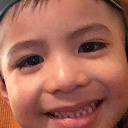

In [54]:
Image.open("cropped_images/42748831_1923937897700515_6868387544646177704_n_1.jpg")

In [5]:
import pandas as pd

In [14]:
df = pd.read_csv('../ages_from_the_wild_v2.csv')

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
df = df.dropna(subset=['age'])

In [20]:
stratify_on = df["age"]
df_train, df_test = train_test_split(df, stratify=stratify_on, train_size=0.8,
                                     random_state=14)


In [21]:
df_train['age'] = df_train['age'].astype('int')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_test['age'] = df_test['age'].astype('int')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
"""df_train.to_csv("../ages_from_the_wild_train.csv")
df_test.to_csv("../ages_from_the_wild_test.csv")"""

In [27]:
df_train = pd.read_csv("../ages_from_the_wild_train.csv")
df_test = pd.read_csv("../ages_from_the_wild_test.csv")

In [31]:
len(df_train.dropna())

397292

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../ages_from_the_wild_v2.csv")

In [4]:
df_train = pd.read_csv("../ages_from_the_wild_train.csv")
df_test = pd.read_csv("../ages_from_the_wild_test.csv")

In [6]:
import seaborn as sns

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


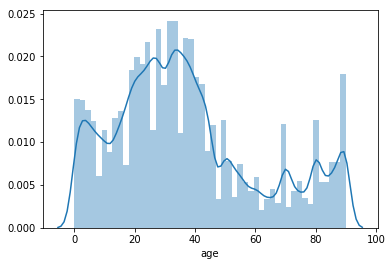

In [7]:
sns.distplot(df_train.age)

In [4]:
df_train[["age", 'age_pred_9', 'age_true_pred_9']]

,age,age_pred_9,age_true_pred_9
0,5,4.603882,3
1,33,35.250538,36
2,39,33.524138,36
3,29,34.744528,34
4,45,52.773406,50
5,41,28.182208,28
6,42,32.788947,31
7,18,18.968895,20
8,27,27.493005,31
9,19,28.559595,26


In [3]:
df = pd.read_pickle("wild_ages_with_detections.pk")

In [8]:
from tqdm import tqdm

In [9]:
tqdm.pandas()

In [13]:
df.dropna(subset=['detections'], inplace=True)

In [14]:
df["num_images"] = df["detections"].progress_apply(lambda x : len(x))

100%|██████████| 539665/539665 [00:00<00:00, 633201.78it/s]


In [16]:
df = df[df['num_images'] > 0] 

In [18]:
import os

In [22]:
list_files = os.listdir("cropped_images/")

In [24]:
df.to_csv('df_with_detections.csv')

KeyboardInterrupt: 

In [30]:
df_files = pd.DataFrame({"files" : list_files})

array(['54731634_369074900365341_9045976995289750188_n_1.jpg'],
      dtype=object)

In [39]:
rows = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    name = row['paths'].split('/')[-1].split('_n.')[0]
    names = df_files[df_files.files.str.contains(name)].files.values
    for name in names:
        rows.append({"name" : name, "age" : row['age']})

  0%|          | 49/365688 [00:13<27:53:45,  3.64it/s]


KeyboardInterrupt: 

In [38]:
dff = pd.DataFrame(rows)
dff.to_csv('ages_from_the_wild_v2.csv')

In [39]:

class CustomModel(nn.Module):
    def __init__(self, model_name, num_classes):
        super(CustomModel, self).__init__()
        back_model = timm.create_model(
            model_name, pretrained=True, num_classes=1
        )
        self.num_classes = num_classes
        self.back = nn.Sequential(*list(back_model.children())[:-1])
        self.fc = list(back_model.children())[-1]
        self.linear_1_bias = nn.Parameter(
            torch.zeros(91 - 1).float()
        )

    def forward(self, x):
        x = self.back(x)
        x = x.view(x.size(0), -1)
        logits = self.fc(x)
        logits = logits + self.linear_1_bias
        probas = torch.sigmoid(logits)
        return logits, probas


In [40]:
model = torch.load("utkface_101_seresnext26t_32x4d_4.0_vs_4.9.h5", map_location=torch.device('cpu'))

/home/shpq/.local/lib/python3.7/site-packages/torch/serialization.py:559: UserWarning: Couldn't retrieve source code for container of type CustomModel. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [10]:
import json

In [32]:
img[y1:y2, x1:x2]

NameError: name 'img' is not defined

In [3]:
import os

In [4]:
len(os.listdir('cropped_images'))

116913

In [ ]:
df_list = pd.read_csv("wild_ages_csvs/")
df = pd.concat(df_list).reset_index(drop=True)

In [15]:
df_prev = pd.read_pickle("wild_ages_with_path.pk")

In [1]:
import os
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm
from PIL import Image
import requests
import argparse


if __name__ == "__main__":

    """parser = argparse.ArgumentParser(argument_default=argparse.SUPPRESS)

    parser.add_argument(
        "--number",
        type=int,
        default=1000,
        help="Number of parallel workers",
    )

    args = parser.parse_args()"""
    number = 500

    main_directory = './'
    csvs_dir = main_directory + "wild_ages_csvs"
    dfs_names = os.listdir(csvs_dir)
    df_list = [pd.read_csv(csvs_dir + "/" + df_name) for df_name in dfs_names if '.csv' in df_name]
    df = pd.concat(df_list).reset_index(drop=True)
    df = df[["text", "url", "src", "age"]]
    # number = args.number
    print(f"new df len {len(df)}")

    try:
        df_prev = pd.read_pickle("wild_ages_with_path.pk")
        print(f"previous df len: {len(df_prev)}")
        df_prev = df_prev[~pd.isna(df_prev.url)]
        print(f"previous df with not nan path len: {len(df_prev)}")
    except:
        df_prev = None
        
    df_append = None
    if df_prev is not None:
        df_append = df[~df.url.isin(df_prev.url)]
        print(f"df to append len: {len(df_append)}")


    def get_results(value):
        try:
            index, row = value
            url = row["url"]
            picture_bytearray = requests.get(url, stream=True).raw
            image = Image.open(picture_bytearray)
            name = url.split("/")[-1].split("?")[0]
            path = main_directory + "images_from_the_wild/" + name
            image.save(path)

        except:
            return None
        return path

    with Pool(number) as p:
        if df_append is not None:
            r = list(tqdm(p.imap(get_results, df_append.iterrows()), total=len(df_append)))
            df_append["paths"] = r
            df_prev = df_prev.append(df_append).reset_index(drop=True)
            df_prev.to_csv("wild_ages_with_path.csv")
            df_prev.to_pickle("wild_ages_with_path.pk")
        else:
            r = list(tqdm(p.imap(get_results, df.iterrows()), total=len(df)))
            df["paths"] = r
            df.to_csv("wild_ages_with_path.csv")
            df.to_pickle("wild_ages_with_path.pk")
        




new df len 579510


100%|██████████| 579510/579510 [1:09:55<00:00, 138.14it/s] 


In [3]:
import cv2
import face_detection
import pandas as pd
import os
from multiprocessing import Pool
from tqdm import tqdm
import argparse
import numpy as np

if __name__ == "__main__":
    """parser = argparse.ArgumentParser(argument_default=argparse.SUPPRESS)

    parser.add_argument(
        "--save",
        default=False,
        help="Save downloaded images?",
        action="store_true",
    )

    parser.add_argument(
        "--force",
        default=False,
        help="Force rewrite?",
        action="store_true",
    )
    args = parser.parse_args()"""
    save = True
    force = True
    print(face_detection.available_detectors)
    main_directory = './'

    detector = face_detection.build_detector(
        "RetinaNetResNet50", confidence_threshold=.95, nms_iou_threshold=.3)

df = pd.read_pickle("wild_ages_with_path.pk")
batch_size = 100

try:
    df_prev = pd.read_pickle("wild_ages_with_detections.pk")
except:
    df_prev = None

def get_image(path):

    if path is None:
        return None

    name = path.split("/")[-1].split(".jpg")[0]
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    return cv2.resize(image, (640, 640))

def get_batched_result(batch_):
    batch_images = np.asarray([np.array(x) for x in batch_.image.values])
    detections_batch = detector.batched_detect(batch_images)
    batch_['detections'] = detections_batch
    for i, row in batch_.iterrows():
        detections = row['detections']
        path = row['paths']
        image = row["image"]
        name = path.split("/")[-1].split(".jpg")[0]
        for ind, result in enumerate(detections):
            x1, y1, x2, y2 = result[0:4].astype(int)
            x1, y1, x2, y2 = max(x1, 0), max(y1, 0), max(x2, 0), max(y2, 0)
            new_path = main_directory + "cropped_images/" + \
                name + "_" + str(ind + 1) + ".jpg"
            if y2-y1 < 50 or x2-x1 < 50:
                continue

            cv2.imwrite(new_path, cv2.cvtColor(cv2.resize(
                image[y1:y2, x1:x2], (128, 128)), cv2.COLOR_BGR2RGB), )
    return batch_

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))
    
def get_results(value):
    index, row = value
    path = row["paths"]
    if path is None:
        return None

    name = path.split("/")[-1].split(".jpg")[0]
    image = cv2.imread(path)
    detections = detector.detect(image)
    if save:
        for ind, result in enumerate(detections):
            x1, y1, x2, y2 = result[0:4].astype(int)
            x1, y1, x2, y2 = max(x1, 0), max(y1, 0), max(x2, 0), max(y2, 0)
            new_path = main_directory + "cropped_images/" + \
                name + "_" + str(ind + 1) + ".jpg"
            if y2-y1 < 50 or x2-x1 < 50:
                continue

            cv2.imwrite(new_path, cv2.resize(
                image[y1:y2, x1:x2], (128, 128)))

    return detections


if not force and df_prev is not None:
    print(f"len of df : {len(df)}")
    df = df[~df.url.isin(df_prev.url)]
    print(f"len of df after cleaning: {len(df)}")


['DSFDDetector', 'RetinaNetResNet50', 'RetinaNetMobileNetV1']


In [4]:
df['detections'] = None
df.dropna(subset=['paths'], inplace=True)
cols = ['text', 'url', 'src', 'paths']


In [ ]:

for batch in tqdm(chunker(df, batch_size), total = len(list(chunker(df, batch_size)))):
    batch["image"] = batch["paths"].apply(get_image)
    batch = get_batched_result(batch)
    df.loc[df.url.isin(batch.url), 'detections'] = batch['detections']



In [1]:
import os

In [43]:
len(os.listdir("cropped_images/"))

123338

In [80]:
list(df.columns) + ['detections']

['text', 'url', 'src', 'paths', 'detections']

In [15]:
from random import sample

In [17]:
from PIL import Image

In [20]:
import pandas as pd

In [21]:
df = pd.read_pickle("wild_ages_with_path.pk")

In [27]:
df = df.dropna(subset=['paths'])

In [32]:
from IPython.display import display

In [58]:
import glob
import os



In [150]:
df_age = df[df.age < 5]

,text,url,src,age,paths
422716,"Photo by Karen Fisher Appleton on March 31, 20...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/48years...,48,./images_from_the_wild/91225817_20381750772215...


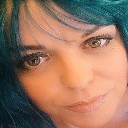

In [166]:
image = sample(os.listdir("cropped_images/"), 1)[0]
display(df[df.paths.str.contains(image[:-7])])


Image.open("cropped_images/" + image)

,text,url,src,age,paths
309587,"Photo by Kokoro Yasuzumi on September 24, 2018.",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/85years...,85,./images_from_the_wild/41389974_23720065362756...


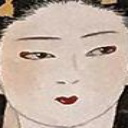

In [177]:

list_of_files = glob.glob('cropped_images/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
image = latest_file.split('/')[-1]
display(df[df.paths.str.contains(image[:-7])])

Image.open("cropped_images/" + image)

In [16]:
for batch in chunker(df, 10):
    pass

In [17]:
batch

,text,url,src,paths
3970,"Photo by Roberto Bardelli on March 15, 2020. I...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/9yearsold/,images_from_the_wild/90229297_504455213576625_...
3971,"Photo shared by Tamara Negelya on April 07, 20...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/7yearsold/,images_from_the_wild/92367058_2886977384713301...
3972,"Photo by Christian Becerra on March 11, 2020. ...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/9yearsold/,images_from_the_wild/87286384_537622390222762_...
3973,"Photo by Nienke Aten in Zuidbroek, Groningen, ...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/5yearsold/,images_from_the_wild/93137566_215362686433930_...
3974,“My wish for you is that this life becomes all...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/7yearsold/,images_from_the_wild/92824006_279677856360687_...


In [8]:
splitted = np.split(df, 5)

In [9]:
for batch in splitted:
    break

In [11]:
batch.paths

0      images_from_the_wild/94951935_528162094727217_...
1      images_from_the_wild/94888908_659743724872686_...
2      images_from_the_wild/94563910_580678979323069_...
3      images_from_the_wild/92008982_677496399669311_...
4      images_from_the_wild/93037661_242240270494119_...
                             ...                        
790    images_from_the_wild/91439535_516184389291459_...
791    images_from_the_wild/91024884_758745937987198_...
792    images_from_the_wild/92960564_230478468172180_...
793    images_from_the_wild/93793203_257144942000135_...
794    images_from_the_wild/93300687_867131387084981_...
Name: paths, Length: 795, dtype: object

In [7]:
df = pd.read_csv("wild_ages_with_path.csv")

In [8]:
df

,Unnamed: 0,text,url,src,age
0,0,Photo shared by ROBERT DOWNEY || FAN ACCOUNT🐨 ...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
1,1,54 pushups on his 54th birthday!!!\nHappy Birt...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
2,2,"Photo by s.kanisha😍 on February 24, 2018. Imag...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
3,3,"Photo by Mamoru Tagata on July 19, 2019. Image...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
4,4,Photo shared by VisionBusinessStrategist on Ma...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
5,5,"Photo by Jack komatsu on September 22, 2013.",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
6,6,"Photo by Kristine Boitano on June 26, 2013.",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
7,7,"Photo by Peace on October 01, 2014.",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
8,8,Photo by @bonzabj in Weave World Wholesalers o...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54
9,9,"Photo by Jordan Andrade on February 07, 2013.",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/explore/tags/54years...,54


In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("../ages_from_the_wild_v2.csv")

In [ ]:
from skle

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = df.dropna(subset=['age'])

In [10]:
df_train, df_test = train_test_split(df)

,Unnamed: 0,name,age
0,0,14272286_1799825600235909_30651779_n_1.jpg,72.0
1,1,67972863_106720733899490_7648203157570451774_n...,34.0
2,2,43913784_526701134407311_7346384371512864622_n...,33.0
3,3,12328230_563175190525919_1153879972_n_3.jpg,38.0
4,4,94181596_156368535792880_7945295596328037782_n...,17.0
5,5,11272849_812360295546261_968210622_n_1.jpg,89.0
6,6,92952115_524693068415459_4193758572927003844_n...,64.0
7,7,13561703_108025649629550_2011533233_n_1.jpg,86.0
8,8,87598929_194172101811322_6845879274743099795_n...,14.0
9,9,84246353_777259356098686_6267719201860317386_n...,33.0


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../ages_from_the_wild_train.csv')

In [3]:
df

,Unnamed: 0,name,age,age_pred_0,age_pred_1,age_true_pred_1,age_pred_2,age_true_pred_2,age_pred_3,age_true_pred_3,...,age_pred_27,age_true_pred_27,age_pred_28,age_true_pred_28,age_pred_29,age_true_pred_29,age_pred_30,age_true_pred_30,age_pred_31,age_true_pred_31
0,0,93705349_690674461692805_4709428082213536862_n...,5,5,12.2,29,13.04,15,16.628,25,...,9.894347,9,12.926043,20,12.348230,11,10.443761,6,10.010633,9
1,1,50924458_2130069840391598_9216521258136810616_...,33,33,33.0,33,32.10,30,32.670,34,...,31.010290,29,31.307203,32,31.815042,33,31.870530,32,32.809371,35
2,2,23098953_1941581139424406_6141005447399735296_...,39,39,37.5,34,35.85,32,34.695,32,...,31.479219,33,31.335453,31,32.434817,35,32.004372,31,32.003060,32
3,3,84665607_547720989178573_8769405701927782970_n...,29,29,31.1,36,30.17,28,31.919,36,...,34.847052,35,36.092936,39,34.565055,31,34.395539,34,34.276877,34
4,4,69877203_117811956263141_489802136473570102_n_...,45,45,43.2,39,42.84,42,40.188,34,...,60.890519,70,54.323364,39,52.726354,49,50.408448,45,51.785914,55
5,5,83992732_189805879050923_7005354927845592188_n...,41,41,36.8,27,33.26,25,32.882,32,...,27.680087,27,27.176061,26,27.723242,29,28.106270,29,28.374389,29
6,6,66023133_163876671323078_3620737628076823170_n...,42,42,39.6,34,37.92,34,36.144,32,...,32.705584,31,31.593909,29,30.215736,27,29.551015,28,30.885711,34
7,7,92187205_2873656132857776_9062242775951577780_...,18,18,15.0,8,16.80,21,19.560,26,...,19.327882,18,18.629517,17,20.840662,26,19.988463,18,19.391924,18
8,8,59473201_2388026394775129_8001696022960098719_...,27,27,26.7,26,26.49,26,27.843,31,...,25.507639,30,26.555348,29,27.888743,31,27.322120,26,26.625484,25
9,9,73385852_680550399020579_4176862660066791192_n...,19,19,25.9,42,27.73,32,29.011,32,...,33.296982,35,31.107888,26,32.275521,35,30.092865,25,31.565005,35


In [116]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', -1)

In [117]:
train, test = pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_train_v5.csv'), pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_test_v5.csv')

In [119]:
i = 30

In [120]:
train['abs_diff'] = np.abs(train['age'] - train[f'age_true_pred_{i}'])

In [121]:
train.sort_values(by='abs_diff', ascending=False, inplace=True)

In [122]:
gen = (x for x in train[train.age < 10][['name', 'age', f'age_true_pred_{i}']][:100].iterrows())

In [123]:
train[train.age < 10][['name', 'age', f'age_true_pred_{i}']][:100]

,name,age,age_true_pred_30
92117,1_0_2_20161219161843718.jpg.chip.jpg,1,50
179043,95592772_246915393322303_3503071321685722986_n_1.jpg,0,48
219929,88276752_1299519460259018_5207352519990575038_n_1.jpg,3,50
198952,94742012_236557564234885_3589773787245844028_n_1.jpg,7,50
184089,93957872_234833917628243_7083087409714195396_n_1.jpg,7,48
139120,3_0_0_20170110212752045.jpg.chip.jpg,3,44
75593,94645180_701277537365862_3140181508317873220_n_1.jpg,0,41
93529,96123733_565295251067774_2377012591326652214_n_2.jpg,0,40
133866,96076043_2598144390427292_243992661290804520_n_2.jpg,0,40
70230,95492859_220943699207390_4140385201167983328_n_2.jpg,0,40


age 0 vs predicted 33


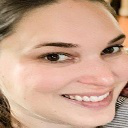

In [204]:
row = next(gen)[1]
print(f"age {row['age']} vs predicted {row[f'age_true_pred_{i}']}")
Image.open("cropped_images/" + row['name'])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


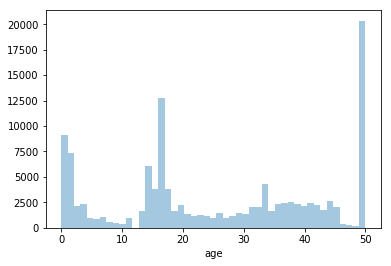

In [36]:
sns.distplot(train.age, kde=False)

In [460]:
train[train.age < 10][['name', 'age', f'age_true_pred_{i}']][:100]

,name,age,age_true_pred_5
56248,1_0_2_20161219161843718.jpg.chip.jpg,1,86
83418,95630588_110040587210465_1094477878178963523_n_1.jpg,0,77
5827,92344674_507211233294471_1873244185365192079_n_1.jpg,6,75
33831,92320983_666867664073539_3170793082136205398_n_1.jpg,6,66
27856,91788380_250469812778687_981328637649660567_n_1.jpg,2,57
52484,93245322_243666243666003_1406308508510649094_n_1.jpg,5,58
83323,88471505_1061473710884834_523709225935409778_n_1.jpg,2,53
74047,95933031_984076698657412_4656179418851487369_n_1.jpg,2,53
31413,91802072_619784728573196_2230166558220974073_n_2.jpg,1,49
69585,93807594_2399502753643592_3831221633795810593_n_1.jpg,1,48


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


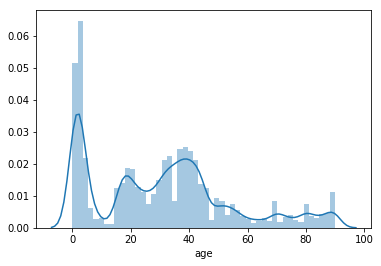

In [5]:
sns.distplot(train.age)

In [1]:
import pandas as pd

In [2]:
train, test = pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_train_v4.csv'), pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_test_v4.csv')

In [3]:
train_ = train.append(test)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [11]:
from sklearn.model_selection import train_test_split

In [4]:
train_ = train_.append(pd.read_csv('new_pictures_rus.csv')).append(pd.read_csv('new_pictures_v2.csv'))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [24]:
rus = pd.read_csv('new_pictures_rus.csv')

In [31]:
v2 = pd.read_csv('new_pictures_v2.csv')

In [33]:
v2[v2.age==12].shape

(0, 3)

In [27]:
rus.shape

(91701, 3)

In [30]:
rus[rus.age==12].shape

(121, 3)

In [5]:
len(train)

124561

In [6]:
len(train_)

333756

In [7]:
train_ = train_.drop_duplicates(subset=['name'])

In [8]:
train_ = train_.sample(len(train_))

In [9]:
len(train_)

285416

In [12]:
train_v4, test_v4 = train_test_split(train_, train_size=0.9)

In [19]:
train_v4 = pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_train_v5.csv')
test_v4 = pd.read_csv('../ages_from_the_wild_true_cleared_stratify_reduced_test_v5.csv')

In [20]:
import seaborn as sns

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


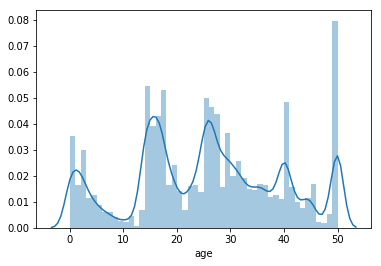

In [23]:
sns.distplot(train_v4.age)

In [14]:
len(train_)

285416

In [15]:
train_.dropna(subset=['age'], inplace=True)

In [17]:
train_['age'] = train_['age'].astype('int')

In [18]:
train_.to_csv("../ages_from_the_wild_v5.csv")

In [106]:
train[train.age < 10][['name', 'age', f'age_true_pred_{i}', f'age_pred_{i}']][:100]

,name,age,age_true_pred_44,age_pred_44
55533,92752784_130060868626887_5475556222221993661_n...,2,75.0,30.274659
51437,93269551_227681831634330_7678162783938244889_n...,1,71.0,28.747596
49641,95141538_156397249189863_160403790152385052_n_...,3,54.0,23.849666
148,94206720_248050616378494_4007203259754160255_n...,1,50.0,22.203114
20063,95501230_236845114074626_2186347978081403587_n...,0,44.0,20.199306
44402,95302708_650220725819015_5243594885898543545_n...,0,41.0,16.400174
83163,94076974_244225036782961_4145321538458786839_n...,0,39.0,16.741106
45620,93402322_210630453572619_5181848647042650909_n...,4,43.0,18.711290
38204,93999633_2270209649952605_5254015831728953852_...,4,43.0,17.967407
43433,94607020_1204569399713621_6933701906060034830_...,0,38.0,15.203585


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../utkface_age/utkface_train.csv').append( pd.read_csv('../../utkface_age/utkface_test.csv'))

In [110]:
import PIL.Image as Image

In [7]:
import pandas as pd

In [117]:
df[df.age < 10]

,Unnamed: 0,name,age,gender
0,8655,1_1_3_20161219224457585.jpg.chip.jpg,1,1
1,3187,8_1_0_20170109205109678.jpg.chip.jpg,8,1
19,12705,5_0_3_20161220220614792.jpg.chip.jpg,5,0
29,12563,1_0_0_20161219200250923.jpg.chip.jpg,1,0
31,8794,7_1_2_20170104005105015.jpg.chip.jpg,7,1
39,15631,2_0_0_20170110212710755.jpg.chip.jpg,2,0
42,7065,1_1_2_20161219142012569.jpg.chip.jpg,1,1
57,1118,1_1_4_20161221195119295.jpg.chip.jpg,1,1
58,1620,5_1_0_20170109194058911.jpg.chip.jpg,5,1
60,2624,2_0_0_20170103202750479.jpg.chip.jpg,2,0


In [ ]:
from sklea

In [122]:
from sklearn.model_selection import train_test_split

In [125]:
tr, te = train_test_split(df[df.age < 10], stratify=df[df.age < 10].age, train_size=0.9)

In [130]:
import os

In [131]:
import shutil


In [134]:
path_prev = "../../utkface_age/utkface/UTKFace_128x128/"

In [138]:
names = df[df.age < 10].name.values

In [139]:
from tqdm.notebook import tqdm

In [140]:
for name in tqdm(names):
    original = path_prev + name
    target = "cropped_images/" + name

    shutil.copyfile(original, target)

In [133]:
files = os.listdir(path_prev)

NameError: name 'path_prev' is not defined

In [141]:
train = train.append(df[df.age < 10], sort=True)

In [162]:
train.name.values[-5]

'9_0_0_20170102235122268.jpg.chip.jpg'

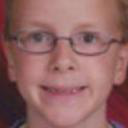

In [163]:
Image.open('cropped_images/' + _)

In [143]:
import seaborn as sns

In [147]:
train.shape

(87754, 95)

In [149]:
train.drop_duplicates(subset=['name']).shape

(87754, 95)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


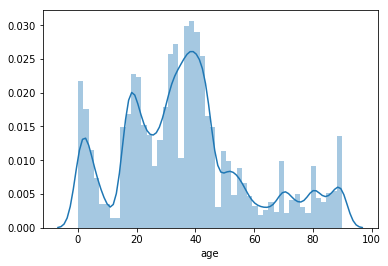

In [144]:
sns.distplot(train.age)

In [ ]:
train.to_csv('../ages_from_the_wild_true_cleared_train.csv')

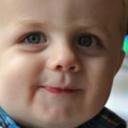

In [118]:
Image.open('../../utkface_age/utkface/UTKFace_128x128/'+"2_0_0_20170110212710755.jpg.chip.jpg")

In [11]:
!nvidia-smi

Fri May  8 10:03:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 435.21       Driver Version: 435.21       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   69C    P0   234W / 300W |  15855MiB / 16160MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
def get_results(value):
        index, row = value
        path = row["paths"]
        if path is None:
            return None

        name = path.split("/")[-1].split(".jpg")[0]
        image = cv2.imread(path)
        detections = detector.detect(image)
        if args.save:
            for ind, result in enumerate(detections):
                x1, y1, x2, y2 = result[0:4].astype(int)
                x1, y1, x2, y2 = max(x1, 0), max(y1, 0), max(x2, 0), max(y2, 0)
                new_path = main_directory + "cropped_images/" + \
                    name + "_" + str(ind + 1) + ".jpg"
                if y2-y1 < 60 or x2-x1 < 60:
                    continue

                cv2.imwrite(new_path, cv2.resize(
                    image[y1:y2, x1:x2], (128, 128)))

        return detections
    if not args.force and df_prev is not None:
        print(f"len of df : {len(df)}")
        df = df[~df.url.isin(df_prev.url)]
        print(f"len of df after cleaning: {len(df)}")

    r = list(tqdm(map(get_results, df.iterrows()), total=len(df)))
    df["detections"] = r
    if df_prev is not None:
        df_prev = df_prev.append(df).reset_index(drop=True)
        df_prev.to_pickle("wild_ages_with_detections.pk")
        df_prev.to_csv("wild_ages_with_detections.csv")
    else:
        df.to_pickle("wild_ages_with_detections.pk")
        df.to_csv("wild_ages_with_detections.csv")
